# **Alternus Vera Part 1 Deliverables**

## **Name:** **Snehal Yeole**

## **SJSU ID:** **012548471**

## **Team:** **Transformers**

## **Factor:** **Credibility Factor**



**Problem Statement:** 

There is huge amount of information being generated and propogated on the internet. Unreliable sources of information expose people to a dose of fake news, hoaxes, rumors, conspiracy theories and misleading news. “Fake news” has acquired a certain legitimacy after being named word of the year by Collins, following what the dictionary called its “ubiquitous presence” over the last 12 months

I explored some of the potential approaches for detection of fake news based on Shu, et. al (2017) paper. "Liar, Liar Pants on Fire" dataset, which is a dataset for experimental research on fake news detection (Wang, 2017), was used in this experiment.

Considering Shu, et. al (2017) paper, one of the first steps that we need to take for detection of fake news is to identify the main factors that would be considered in our computation of the fake-news-likelihood scores. Based on Shu, et. al (2017) paper, 10 of the most important factors for detection of fake news were identified:


*   Sensationalism
*   Source credibility
*   Political Affiliation
*   Controversy Score
*   **Credibility/Fact Checks** <= one of the target factor of this experiment
*   Credibility of syntactic features
*   Context modeling 
*   Hate Speech detection
*   Spam detection
*   Echo Chamber

In this experiment I tried to explore whether Speaker sentiment analysis would be useful to assess the credibility of statements and helpful in detection of fake news and determination of level of trueness of news.

Another point worth mentioning is that truth and false are relative and they are very hard to be measured. So the goal was not to find whether news is just fake or not fake (true or false). That's why the Liar Liar dataset has been classified and consists of 6 different classes. Detection of fake news is a multi-classification problem and it's not a binary classification problem











**Base Dataset**

**LIAR Dataset** - for political affiliation William Yang Wang introduced a daataset called LIAR. This is a new, publicly available data set for detection of fake news. Automatic fake news detection is a challenging problem in deception detection, and it has tremendous real-world political and social impacts. However, statistical approaches to combating fake news has been dramatically limited by the lack of labeled benchmark datasets. In this paper, we present liar: a new, publicly available dataset for fake news detection. We collected a decade-long, 12.8K manually labeled short statements in various contexts from PolitiFact.com, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type.

**Enrichment Dataset details:**

*   SenticNet5 sensational words corpus
*   Google News 3million words corpus for spell check
*   Sensational Words Dictionary
*   PoliticalFact Fake news and Real News Content
*   Clickbait and non_clickbait datasets
*   Spam Dictionary

**NOTE:** The datasets mentioned above will be added later in the final notebook 

**Libraries used:**

*   Gensim
*   Numpy
*   Pandas
*   CSV
*   WordCloud
*   Seaborn
*   Matplotlib
*   Sklearn

**Process followed as part of Distillation**



*   Data Preprocessing
*   LDA and Topic Modeling
*   Sentiment Analysis
*   Bag of Words
*   TF-IDF
*   Doc2Vec
*   word2Vec


## **Import required libraries**

In [0]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from IPython.display import Image
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from graphviz import Digraph

## **Mount the shared drive on google colab**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load the Liar Liar dataset**

In [0]:
train_data = "/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/train.xlsx"
test_data = "/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/test.tsv"
valid_data = "/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/valid.tsv"

## **Read the train, test, and validation data from Liar Liar dataset**

In [0]:
training_data = pd.read_excel(train_data)

#Adding the column names in train dataset
#columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         #'speaker_job', 'state', 'party', 'barely_true_counts',
         #'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         #'context']
#training_data.columns = columns
training_data.head(5)

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


**Read the test data from Liar Liar dataset**

In [0]:
testing_data = pd.read_csv(test_data, sep='\t', header = None)

#Adding the column names in test dataset
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
testing_data.columns = columns
testing_data.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


**Read the validation data from Liar Liar dataset**

In [0]:
validation_data = pd.read_csv(valid_data, sep='\t', header = None)

#Adding the column names in validation dataset
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
validation_data.columns = columns
validation_data.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


## **Exploratory Data Analysis on Liar Liar dataset**

**Check total number of records in the dataset**

In [0]:
print ("Number of records in LIAR LIAR dataset:",len(pd.read_excel("/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/train.xlsx", delimiter='\t')))

Number of records in LIAR LIAR dataset: 10269


**Dimensions of the data**

In [0]:
print("Number of Rows and Columns::", training_data.shape)
print(training_data.loc[0])

Number of Rows and Columns:: (10269, 14)
ID                                                              2635.json
label                                                               False
statement               Says the Annies List political group supports ...
subject(s)                                                       abortion
speaker                                                      dwayne-bohac
speaker's job title                                  State representative
state info                                                          Texas
party affiliation                                              republican
barely true counts                                                      0
false counts                                                            1
half true counts                                                        0
mostly true counts                                                      0
pants on fire counts                                                   

### **Checking the distribution of classes in train, test, and validation data based on the "label"**

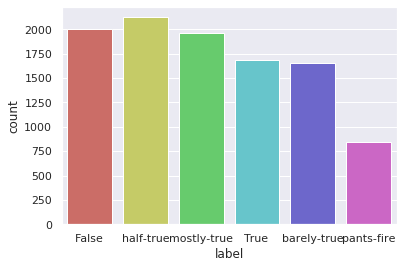

In [0]:
sns.countplot(x='label', data=training_data, palette='hls')

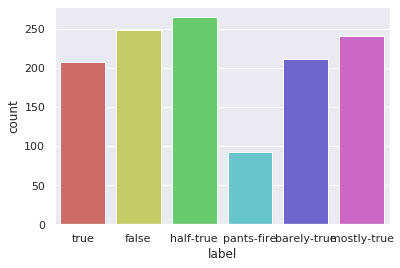

In [0]:
sns.countplot(x='label', data=testing_data, palette='hls')

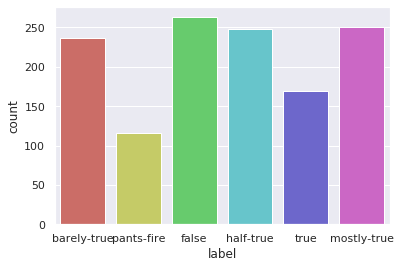

In [0]:
sns.countplot(x='label', data=validation_data, palette='hls')

As we can see all datasets consist of different types of label-classes. Therefore all classes should be considered in the classification process and none of them should be dropped.

### **Checking the missing values in train, test, and validation data**

In [0]:
training_data.isnull().sum()

ID                         0
label                      0
statement                  0
subject(s)                 6
speaker                    6
speaker's job title     2906
state info              2214
party affiliation          6
barely true counts         6
false counts               6
half true counts           6
mostly true counts         6
pants on fire counts       6
context                  106
dtype: int64

In [0]:
testing_data.isnull().sum()

id                        0
label                     0
statement                 0
subjects                  0
speaker                   0
speaker_job             325
state                   262
party                     0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  17
dtype: int64

In [0]:
validation_data.isnull().sum()

id                        0
label                     0
statement                 0
subjects                  0
speaker                   0
speaker_job             345
state                   279
party                     0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  12
dtype: int64

### **Retrieve the statistical details for training, testing, and validation data**

In [0]:
training_data.describe()

,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts
count,10263.000000,10263.000000,10263.000000,10263.000000,10263.000000
mean,11.549839,13.304394,17.168762,16.465166,6.202670
std,18.992224,24.132578,35.899983,36.202646,16.121555
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,15.000000,13.000000,11.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


In [0]:
testing_data.describe()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,11.770324,13.465667,17.566693,16.912391,6.016575
std,18.980496,23.956307,36.109290,36.499879,15.059981
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000
75%,12.000000,17.000000,15.000000,14.000000,6.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


In [0]:
validation_data.describe()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000
mean,11.804517,13.832555,17.225078,16.595794,6.881620
std,19.021708,24.546884,35.622818,35.966699,17.597474
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.750000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000
75%,12.000000,17.000000,13.000000,12.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


##**Visualizations**

**Pair Plot to visualize the distribution of data in training set**

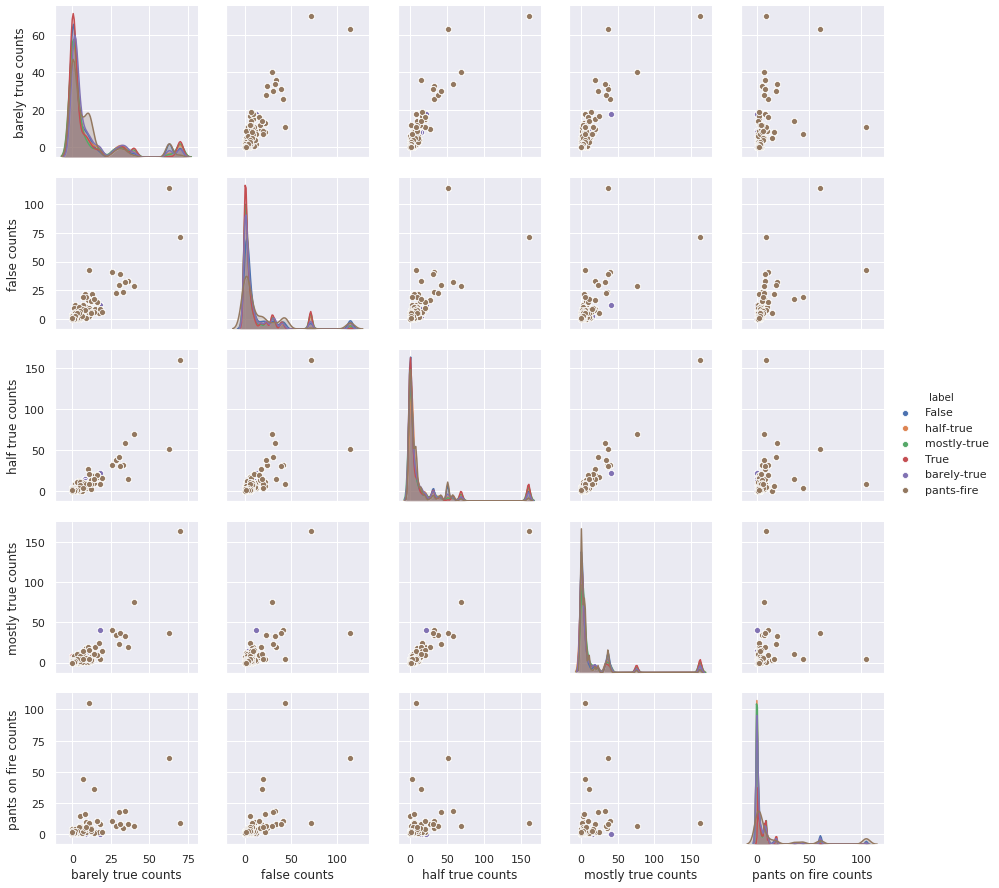

In [0]:
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=RuntimeWarning)
pair_plot = sns.pairplot(training_data, hue="label")

**Pie chart to visualize the distribution of data in training set**

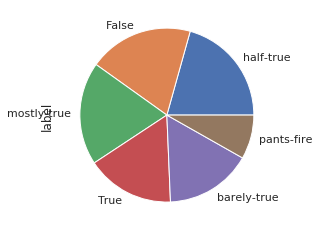

In [0]:
%matplotlib inline
training_data['label'].value_counts().plot(kind="pie")

### **HeatMap of the labels**

In [0]:
labels = training_data.groupby('label').mean()
labels.corr()

,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts
barely true counts,1.000000,-0.162210,0.333191,0.311055,-0.398112
false counts,-0.162210,1.000000,-0.823635,-0.851036,0.921357
half true counts,0.333191,-0.823635,1.000000,0.983965,-0.856301
mostly true counts,0.311055,-0.851036,0.983965,1.000000,-0.879174
pants on fire counts,-0.398112,0.921357,-0.856301,-0.879174,1.000000


**Visualize the HeatMap**

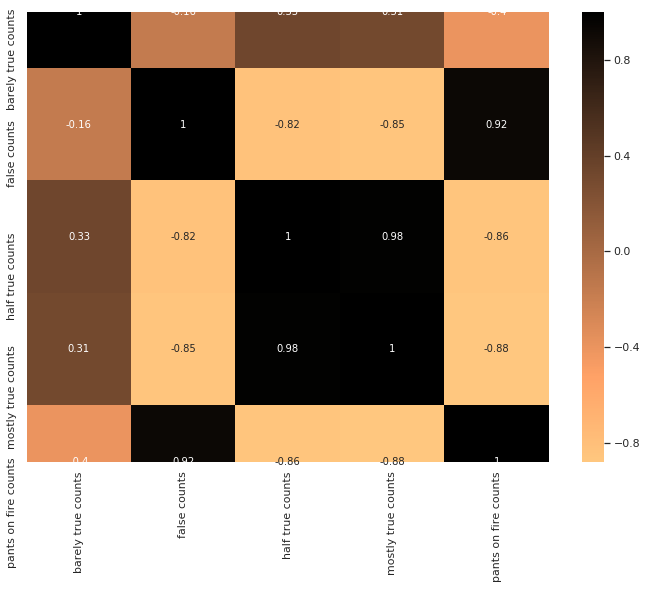

In [0]:
import seaborn as sns
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=labels.corr(), annot=True, cmap="copper_r")

### **Visualizing mostly used words corresponding to True, False, barely-true, mostly-true, half-true, pants-fire labels**

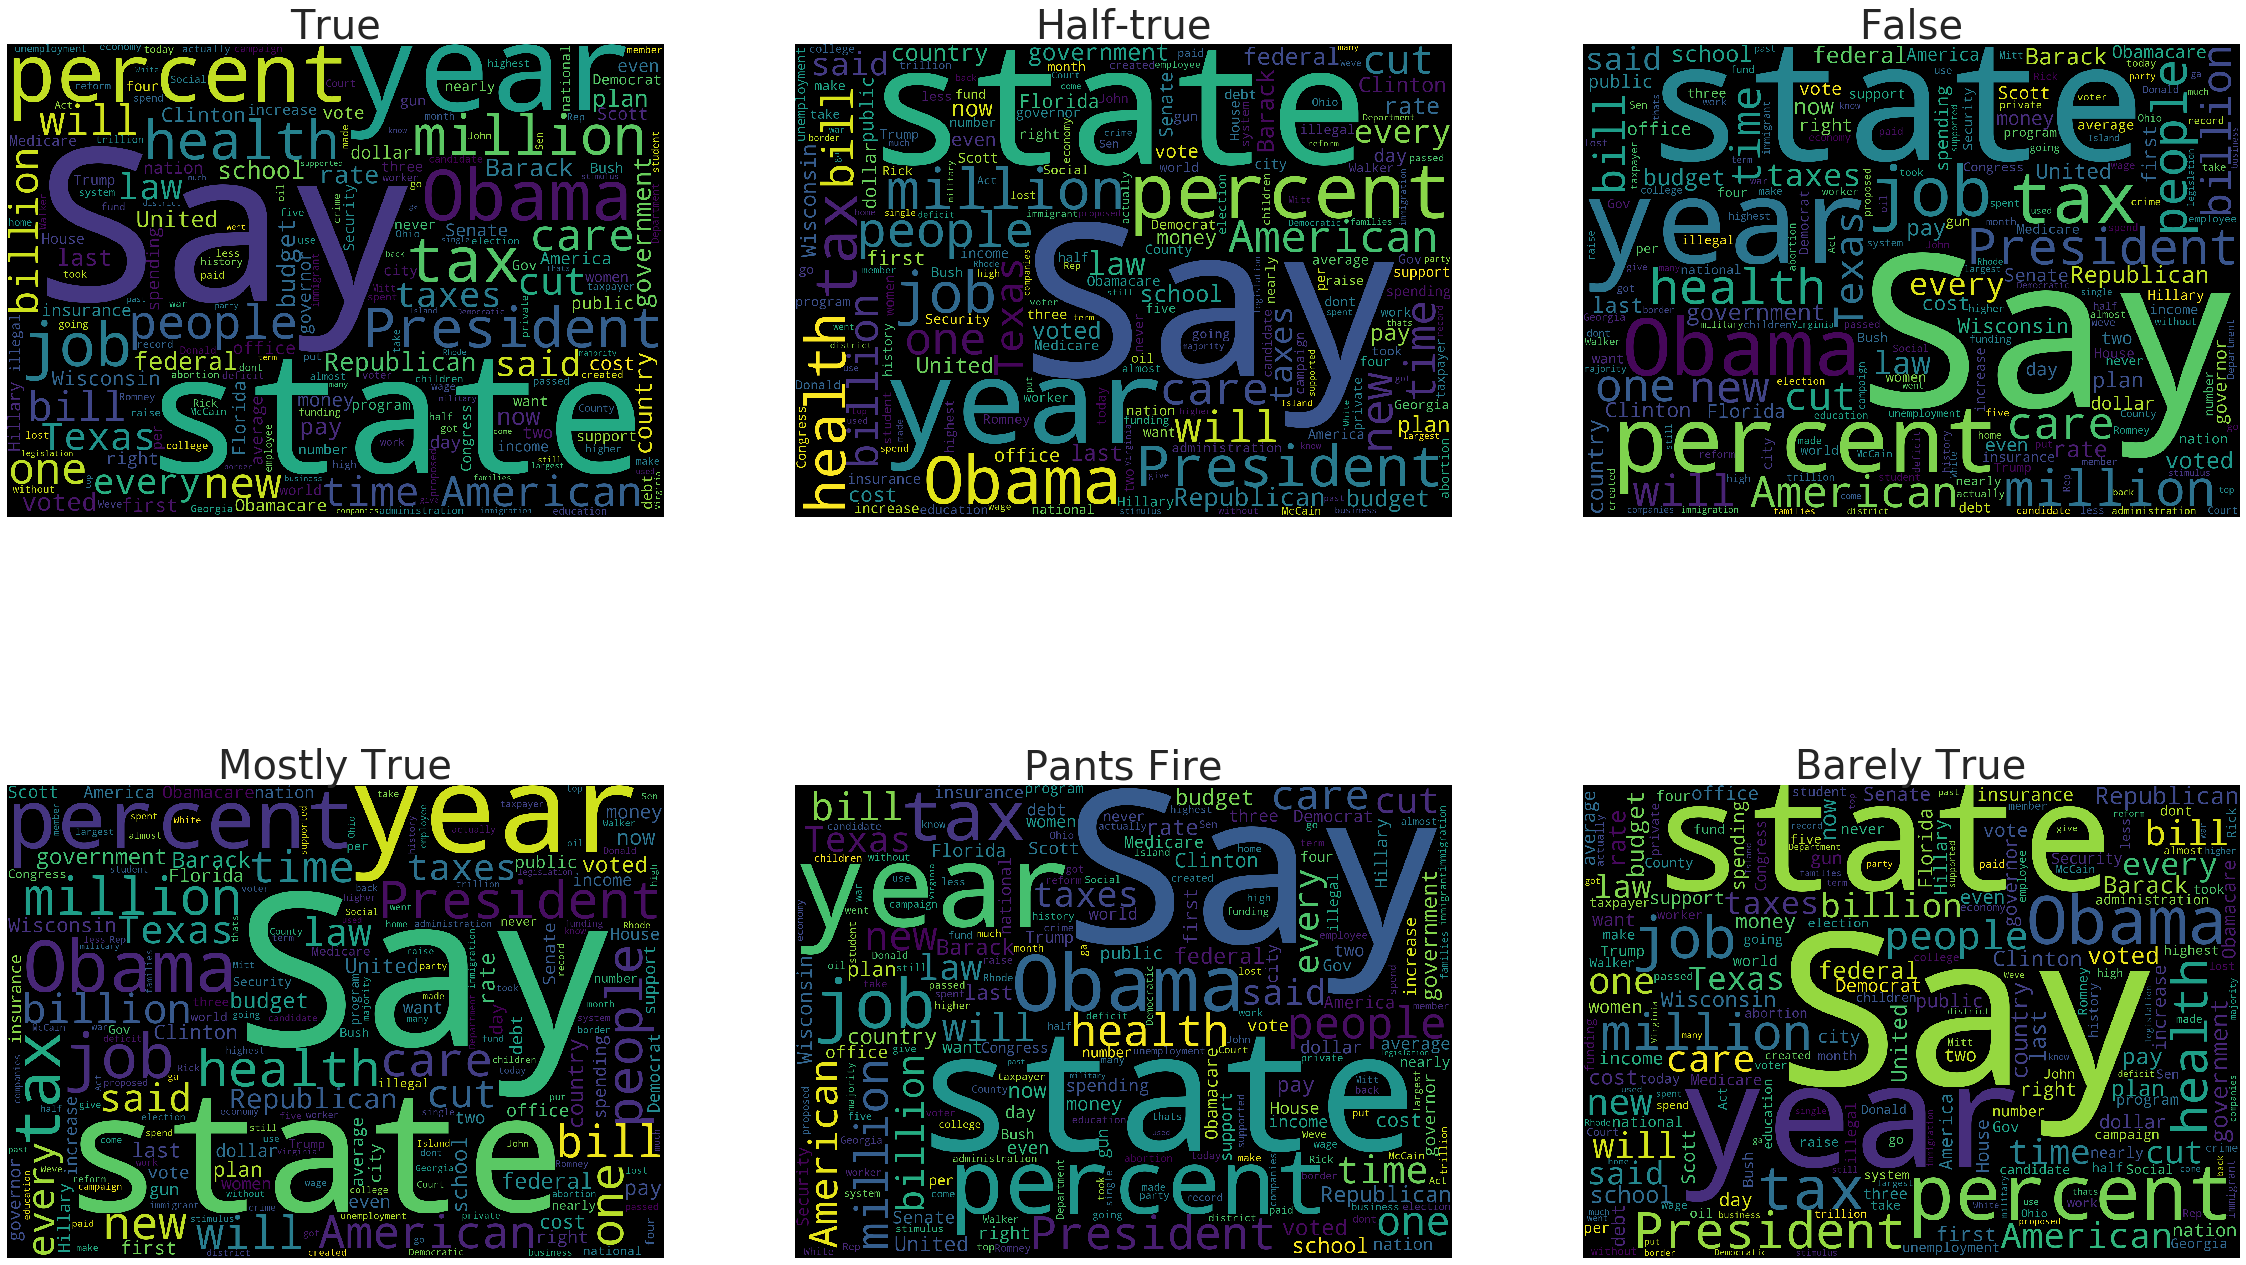

In [0]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# true
subset = training_data[training_data.label==True]
text = training_data['statement']
cloud_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))


plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("True",fontsize=40)
plt.imshow(cloud_true)

# true
subset = training_data[training_data.label=='half-true']
text = training_data['statement']
cloud_half_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Half-true",fontsize=40)
plt.imshow(cloud_half_true)



# false
subset = training_data[training_data.label=='false']
text = training_data['statement']
cloud_false = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("False",fontsize=40)
plt.imshow(cloud_false)



# mostly-true
subset = training_data[training_data.label=='mostly-true']
text = training_data['statement']
cloud_mostly_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Mostly True",fontsize=40)
plt.imshow(cloud_mostly_true)

#pants-fire
subset = training_data[training_data.label=='pants-fire']
text = training_data['statement']
cloud_pants_fire = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Pants Fire",fontsize=40)
plt.imshow(cloud_pants_fire)


#barely-true
subset = training_data[training_data.label=='barely-true']
text = training_data['statement']
cloud_barely_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Barely True",fontsize=40)
plt.imshow(cloud_barely_true)

### **Word Cloud Visualization for getting a sense of the statements**

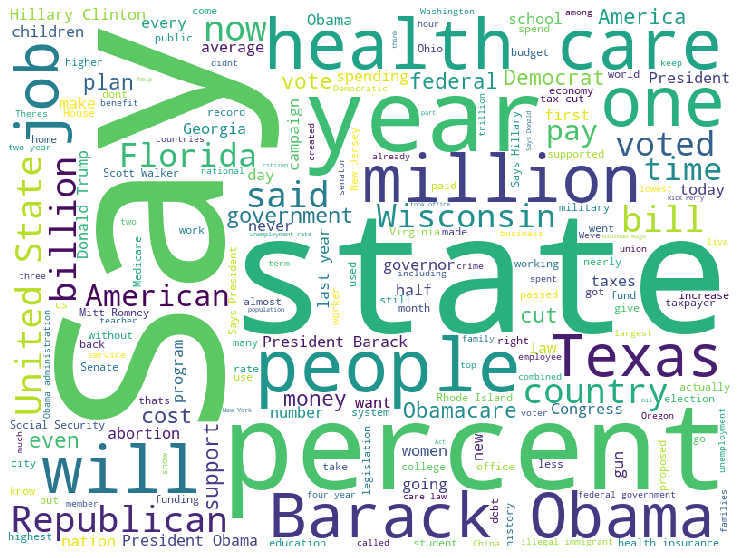

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(training_data['statement']))

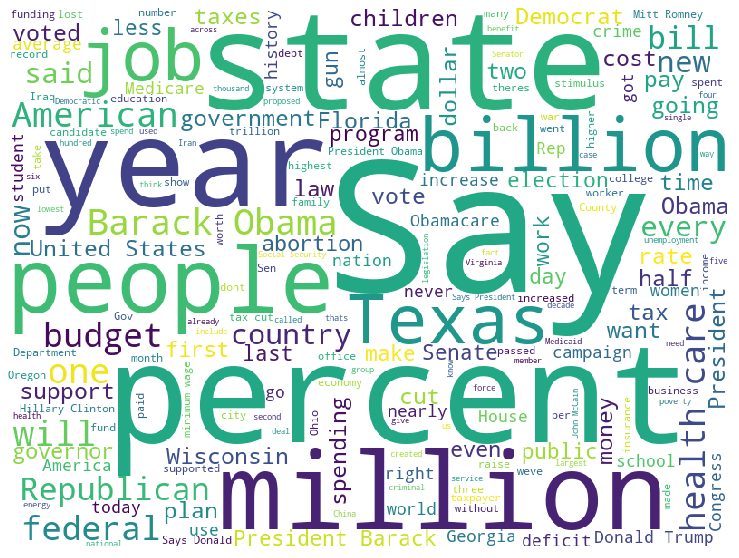

In [0]:
cloud(' '.join(testing_data['statement']))

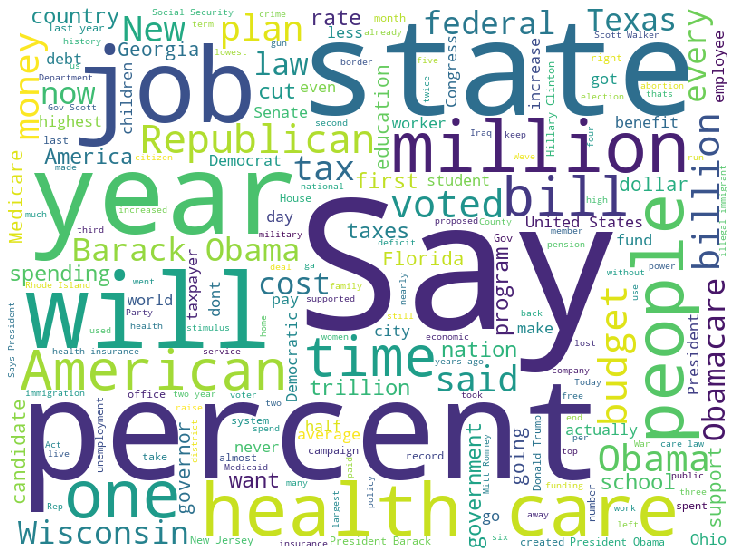

In [0]:
cloud(' '.join(validation_data['statement']))

## **Data Preparation**

**Retrieving label and context columns into X_train and Y_train respectively**

In [0]:
#Split the data into train and test sets
X_train=training_data["context"]
Y_train=training_data["label"]

**Checking the count of context with respect to label**

In [0]:
CT = pd.crosstab(training_data['context'],training_data['label'],margins=True)
CT.head()

label,False,True,barely-true,half-true,mostly-true,pants-fire,All
context,,,,,,,
CNN's 'The Situation Room',1,0,0,0,0,0,1
CNN's State of the Union with John King,0,0,0,0,1,0,1
This Week with George Stephanopoulos,0,0,0,1,0,0,1
Washington Report newsletter to constituents.,1,0,0,0,0,0,1
a Webcast,1,0,0,0,0,0,1


**Sorting the values in the descending order with respect to count**

In [0]:
CT.sort_values('All', ascending=False)

label,False,True,barely-true,half-true,mostly-true,pants-fire,All
context,,,,,,,
All,1974,1662,1642,2106,1948,831,10163
a news release,44,44,45,46,41,22,242
an interview,58,34,30,47,47,13,229
a press release,41,44,34,46,45,13,223
a speech,34,44,25,55,50,8,216
...,...,...,...,...,...,...,...
"a rally in Hershey, Pa.",0,0,0,0,0,1,1
a rally in New Hampshire,0,0,0,0,1,0,1
a rally in North Carolina,0,0,0,1,0,0,1


**Visualizing the context**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


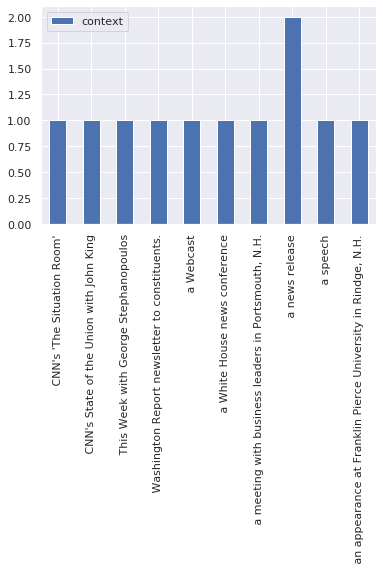

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = training_data['context'].value_counts().sort_index(ascending=True).head(10).plot('bar', ax=ax, legend=True)

**Checking the interview word in context column**

In [0]:
import numpy as np
mask = np.column_stack([training_data[col].str.contains("interview") for col in ['context']])
print (mask)
unique, counts = np.unique(mask, return_counts=True)
dictionary = dict(zip(unique, counts))

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [True]]


**Printing the total false and true values**

In [0]:
print(dictionary)

{False: 1482, nan: 1, True: 159}


**Visualize the data for barely true values**

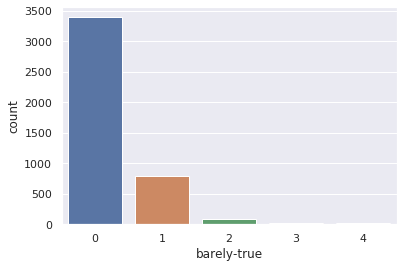

In [0]:
import seaborn as sns
sns.countplot(x="barely-true", data=CT,order=CT["barely-true"].value_counts().iloc[:5].index)
plt.show()

In [0]:
training_data['mask'] = mask
mask

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [True]], dtype=object)

**Retrieving the dataset after preparation**

In [0]:
training_data.head()

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,mask
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,False
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,False
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,False
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,False
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,True


**After visualizing the data for the label column it looks unbalanced**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


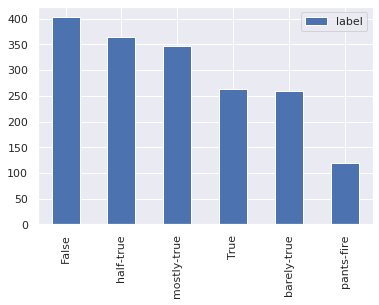

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = training_data[training_data['mask']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

**Checking the tweet word in context column**

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if __name__ == '__main__':


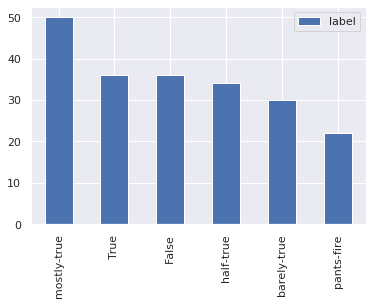

In [0]:
import numpy as np
twitter = np.column_stack([training_data[col].str.contains("tweet") for col in ['context']])
print (twitter)
unique, counts = np.unique(twitter, return_counts=True)
dict(zip(unique, counts))
training_data['twitter'] = twitter
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = training_data[training_data['twitter']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

**Checking the debate word in context column**

[[False]
 [False]
 [False]
 ...
 [True]
 [True]
 [False]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if __name__ == '__main__':


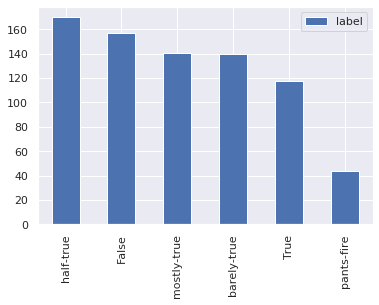

In [0]:
import numpy as np
debate = np.column_stack([training_data[col].str.contains("debate") for col in ['context']])
print (debate)
unique, counts = np.unique(debate, return_counts=True)
dict(zip(unique, counts))
training_data['debate'] = debate
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = training_data[training_data['debate']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

**Checking the representative word is present or not in Speaker\'s job title column**

[[True]
 [False]
 [False]
 ...
 [nan]
 [nan]
 [False]]
{False: 21, nan: 1, True: 1}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  # Remove the CWD from sys.path while we load stuff.


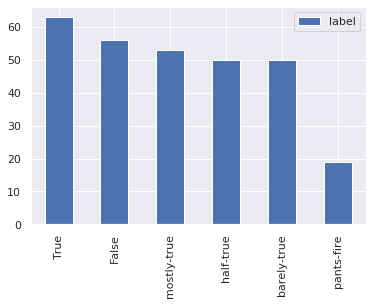

In [0]:
import numpy as np
representative = np.column_stack([training_data[col].str.contains("representative") for col in ['speaker\'s job title']])
print (representative)
unique, counts = np.unique(representative, return_counts=True)
dictionary_representative = dict(zip(unique, counts))
print(dictionary_representative)
training_data['representative'] = representative
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = training_data[training_data['representative']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

**Checking the President word is present or not in Speaker's job title column**

[[False]
 [False]
 [True]
 ...
 [nan]
 [nan]
 [False]]
{False: 9, nan: 1, True: 3}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if __name__ == '__main__':


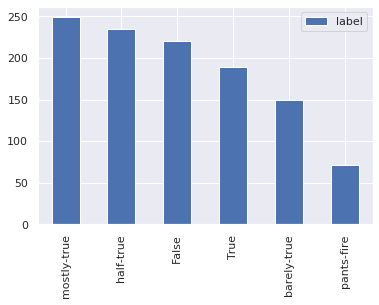

In [0]:
president = np.column_stack([training_data[col].str.contains("President") for col in ['speaker\'s job title']])
print (president)
unique, counts = np.unique(president, return_counts=True)
dictionary_president = dict(zip(unique, counts))
print(dictionary_president)
training_data['president'] = president
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = training_data[training_data['president']==True]['label'].value_counts().plot('bar', ax=ax, legend=True)

## **Distillation - LDA**

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

Below we have applied LDA to a set of documents and split them into topics.

**Load the dataset and assign index to the 'statement' column**

In [0]:
import pandas as pd
data = pd.read_excel("/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/train.xlsx", error_bad_lines=False);
data_text = data[['statement']]
data_text['index'] = data_text.index
documents = data_text
#documents.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Finding the number of documents**

In [0]:
len(documents)

10269

**Printing the first five documents**

In [0]:
documents[:5]

,statement,index
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",2
3,Health care reform legislation is likely to ma...,3
4,The economic turnaround started at the end of ...,4


### **Data Preprocessing**

We will perform the following steps:


*   Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
*   Words that have fewer than 3 characters are removed.
*   All stopwords are removed.
*   Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
*   Words are stemmed — words are reduced to their root form.

**Load Gensim and NLTK libraries**

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

**Download the resource 'wordnet'**

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Lemmetization example**

In [0]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


**Stemmer example**

In [0]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


The major difference between Stemming and Lemmatizing is, stemming can often create non-existent words, whereas lemmas are actual words.

**Function to perform Lemmetization and Stem preprocessing steps on the data set**

In [0]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

**Select a document to preview after preprocessing**

In [0]:
doc_sample = documents[documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Says', 'state', 'Sen.', 'Morgan', 'Carrolls', 'votes', 'made', 'it', 'easier', 'to', 'sue', 'doctors,', 'small', 'businesses,', 'even', 'nurses.', 'Putting', 'her', 'own', 'shady', 'interests', 'first.']


 tokenized and lemmatized document: 
['say', 'state', 'morgan', 'carrol', 'vote', 'easier', 'doctor', 'small', 'busi', 'nurs', 'put', 'shadi', 'interest']


**Preprocess the statment text, saving the results as ‘processed_docs’**

In [0]:
processed_docs = documents['statement'].map(preprocess)

In [0]:
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: statement, dtype: object

### **Bag of words on the dataset**

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)

**Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set**

In [0]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


**Gensim filter_extremes**

Filter out tokens that appear in:


*   less than 15 documents (absolute number) or
*   more than 0.5 documents (fraction of total corpus size, not absolute number)
*   after the above two steps, keep only the first 100000 most frequent tokens

In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(5, 1),
 (24, 1),
 (117, 1),
 (152, 1),
 (352, 1),
 (535, 1),
 (708, 1),
 (906, 1),
 (1065, 1)]

**Preview Bag Of Words for our sample preprocessed document**

In [0]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 5 ("say") appears 1 time.
Word 24 ("vote") appears 1 time.
Word 117 ("state") appears 1 time.
Word 152 ("busi") appears 1 time.
Word 352 ("nurs") appears 1 time.
Word 535 ("small") appears 1 time.
Word 708 ("doctor") appears 1 time.
Word 906 ("put") appears 1 time.
Word 1065 ("interest") appears 1 time.


### **Visualize the top 10 Statements in the dataset**

**Import the required libraries**

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

**Python function to plot the WordCloud**

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()  

**Visualize the topmost statements**

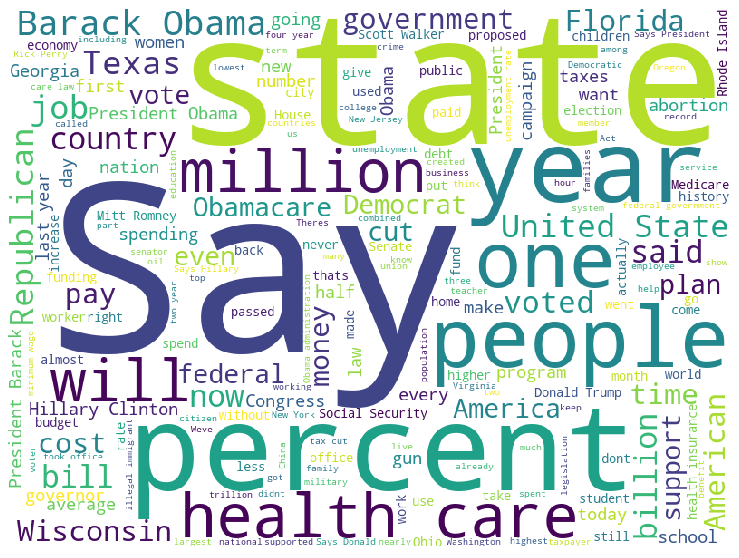

In [0]:
cloud(' '.join(data['statement']))

### **TF-IDF**

In [0]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [0]:
corpus_tfidf = tfidf[bow_corpus]

In [0]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3399028377044521),
 (1, 0.49960086945501425),
 (2, 0.40963633375026987),
 (3, 0.46333565607020666),
 (4, 0.40830190020991924),
 (5, 0.10872586224577774),
 (6, 0.27175617970851096)]


### **Running LDA using Bag of Words**

**Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’**

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

**For each topic, we will explore the words occuring in that topic and its relative weight**

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.046*"say" + 0.021*"texa" + 0.021*"state" + 0.019*"american" + 0.017*"vote" + 0.012*"time" + 0.012*"million" + 0.010*"america" + 0.010*"percent" + 0.009*"debt"
Topic: 1 
Words: 0.037*"year" + 0.034*"health" + 0.034*"state" + 0.024*"care" + 0.017*"percent" + 0.014*"budget" + 0.014*"insur" + 0.013*"countri" + 0.013*"say" + 0.013*"billion"
Topic: 2 
Words: 0.030*"say" + 0.029*"state" + 0.023*"republican" + 0.021*"percent" + 0.021*"vote" + 0.016*"senat" + 0.015*"elect" + 0.014*"democrat" + 0.011*"spend" + 0.011*"florida"
Topic: 3 
Words: 0.042*"percent" + 0.038*"job" + 0.024*"govern" + 0.023*"american" + 0.022*"say" + 0.021*"feder" + 0.016*"lose" + 0.016*"creat" + 0.012*"incom" + 0.010*"year"
Topic: 4 
Words: 0.055*"say" + 0.024*"clinton" + 0.019*"hillari" + 0.017*"school" + 0.015*"state" + 0.014*"public" + 0.014*"tax" + 0.013*"want" + 0.012*"obama" + 0.011*"presid"
Topic: 5 
Words: 0.036*"care" + 0.036*"health" + 0.030*"say" + 0.016*"plan" + 0.016*"cost" + 0.015*"year" +

**Topics Identified**


*   Vote percentage from Texas state in amercian elections
*   Expenditure by state on health care every year
*   Republican and Democrats elections vote percentage
*   Unemployment rate and american businesses
*   Elections - Vote percentage for Hillary Clinton
*   Health care expenditure
*   President Obama and american healthcare
*   Illegal immigrants
*   Expenditure by state on schools
*   Obama's plans presented to Republicans

### **Visualize the topics with PyLDAvis**

In [0]:
pip install pyldavis

In [0]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.026787  0.036562       1        1  11.179955
9      0.111385  0.003457       2        1  10.914524
6     -0.006277  0.023425       3        1  10.573130
2      0.032350 -0.037917       4        1  10.150001
5     -0.064928 -0.066607       5        1  10.131392
1     -0.094313 -0.072466       6        1   9.866028
0      0.011753  0.028371       7        1   9.860806
7      0.024712 -0.042077       8        1   9.221058
4      0.092735  0.010242       9        1   9.192157
3     -0.080631  0.117011      10        1   8.910954, topic_info=    Category        Freq      Term       Total  loglift  logprob
28   Default  633.000000    health  633.000000  30.0000  30.0000
25   Default  537.000000      care  537.000000  29.0000  29.0000
163  Default  814.000000     obama  814.000000  28.0000  28.0000
254  Default  500.000000       job  500.000000  27.0000  27.0000
14   Default  639.000000    presid  639.000000  26.0000  26.0000
..       ...         ...       ...         ...      ...      ...
229  Topic10   32.653149     illeg  224.297333   0.4909  -5.2997
185  Topic10   31.558847     secur  203.747681   0.5529  -5.3338
6    Topic10   31.793373   support  339.193848   0.0506  -5.3263
146  Topic10   30.576223  unemploy  178.665421   0.6526  -5.3654
91   Topic10   32.108948     peopl  574.017944  -0.4656  -5.3165

[653 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
607       2  0.067505  abbott
607       4  0.135010  abbott
607       7  0.135010  abbott
607       8  0.607544  abbott
158       1  0.497373     abl
...     ...       ...     ...
165       3  0.039426    your
165       4  0.019713    your
165       6  0.197129    your
165       7  0.098565    your
165       8  0.118278    your

[3310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 7, 3, 6, 2, 1, 8, 5, 4])

### **Running LDA using TF-IDF**

**Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’**

In [0]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

**For each topic, we will explore the words occuring in that topic and its relative weight**

In [0]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"state" + 0.012*"health" + 0.012*"say" + 0.010*"care" + 0.010*"billion" + 0.008*"support" + 0.007*"obamacar" + 0.007*"hous" + 0.007*"dollar" + 0.007*"plan"
Topic: 1 Word: 0.016*"percent" + 0.013*"say" + 0.011*"spend" + 0.009*"year" + 0.009*"unemploy" + 0.009*"take" + 0.009*"time" + 0.009*"obama" + 0.008*"offic" + 0.008*"rate"
Topic: 2 Word: 0.019*"say" + 0.009*"clinton" + 0.009*"presid" + 0.008*"obama" + 0.008*"hillari" + 0.008*"state" + 0.007*"percent" + 0.007*"year" + 0.007*"vote" + 0.007*"texa"
Topic: 3 Word: 0.013*"say" + 0.012*"american" + 0.010*"percent" + 0.010*"vote" + 0.008*"scott" + 0.007*"peopl" + 0.007*"major" + 0.007*"rick" + 0.007*"year" + 0.007*"govern"
Topic: 4 Word: 0.013*"say" + 0.011*"immigr" + 0.010*"democrat" + 0.010*"illeg" + 0.010*"year" + 0.009*"percent" + 0.008*"parti" + 0.008*"million" + 0.008*"state" + 0.007*"texa"
Topic: 5 Word: 0.014*"say" + 0.010*"health" + 0.010*"care" + 0.010*"state" + 0.009*"year" + 0.009*"percent" + 0.007*"romney" 

### **Performance evaluation by classifying sample document using LDA Bag of Words model**

**Let's check whether our test document would be classified**

In [0]:
processed_docs[4310]

['say',
 'state',
 'morgan',
 'carrol',
 'vote',
 'easier',
 'doctor',
 'small',
 'busi',
 'nurs',
 'put',
 'shadi',
 'interest']

**Print the score for each topic**

In [0]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6094998717308044	 
Topic: 0.036*"care" + 0.036*"health" + 0.030*"say" + 0.016*"plan" + 0.016*"cost" + 0.015*"year" + 0.015*"work" + 0.013*"million" + 0.012*"percent" + 0.012*"busi"

Score: 0.3104819357395172	 
Topic: 0.046*"say" + 0.021*"texa" + 0.021*"state" + 0.019*"american" + 0.017*"vote" + 0.012*"time" + 0.012*"million" + 0.010*"america" + 0.010*"percent" + 0.009*"debt"

Score: 0.010003088973462582	 
Topic: 0.059*"say" + 0.047*"obama" + 0.032*"presid" + 0.029*"barack" + 0.018*"vote" + 0.015*"percent" + 0.010*"go" + 0.010*"democrat" + 0.009*"citi" + 0.009*"support"

Score: 0.010002615861594677	 
Topic: 0.045*"say" + 0.018*"immigr" + 0.017*"vote" + 0.015*"percent" + 0.014*"peopl" + 0.013*"illeg" + 0.013*"tax" + 0.011*"million" + 0.010*"year" + 0.010*"cut"

Score: 0.010002396069467068	 
Topic: 0.030*"say" + 0.029*"state" + 0.023*"republican" + 0.021*"percent" + 0.021*"vote" + 0.016*"senat" + 0.015*"elect" + 0.014*"democrat" + 0.011*"spend" + 0.011*"florida"

Score: 0.010002

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

### **Performance evaluation by classifying sample document using LDA TF-IDF model**

In [0]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9099799394607544	 
Topic: 0.015*"secur" + 0.014*"social" + 0.012*"say" + 0.011*"tax" + 0.010*"rais" + 0.008*"peopl" + 0.008*"year" + 0.007*"want" + 0.007*"percent" + 0.007*"romney"

Score: 0.01000314112752676	 
Topic: 0.013*"say" + 0.011*"immigr" + 0.010*"democrat" + 0.010*"illeg" + 0.010*"year" + 0.009*"percent" + 0.008*"parti" + 0.008*"million" + 0.008*"state" + 0.007*"texa"

Score: 0.010003121569752693	 
Topic: 0.013*"obama" + 0.013*"percent" + 0.012*"say" + 0.011*"vote" + 0.011*"state" + 0.008*"year" + 0.008*"republican" + 0.008*"presid" + 0.007*"job" + 0.006*"time"

Score: 0.010002528317272663	 
Topic: 0.014*"state" + 0.012*"health" + 0.012*"say" + 0.010*"care" + 0.010*"billion" + 0.008*"support" + 0.007*"obamacar" + 0.007*"hous" + 0.007*"dollar" + 0.007*"plan"

Score: 0.01000205148011446	 
Topic: 0.014*"say" + 0.010*"health" + 0.010*"care" + 0.010*"state" + 0.009*"year" + 0.009*"percent" + 0.007*"romney" + 0.007*"million" + 0.007*"abort" + 0.007*"crime"

Score: 0.010001

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

### **Testing Bag of Words model on unseen document**

In [0]:
unseen_document = 'Fake news is getting weaponized and it has proven effective.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.465106725692749	 Topic: 0.059*"say" + 0.047*"obama" + 0.032*"presid" + 0.029*"barack" + 0.018*"vote"
Score: 0.40153372287750244	 Topic: 0.042*"percent" + 0.038*"job" + 0.024*"govern" + 0.023*"american" + 0.022*"say"
Score: 0.016672465950250626	 Topic: 0.045*"say" + 0.018*"immigr" + 0.017*"vote" + 0.015*"percent" + 0.014*"peopl"
Score: 0.016670558601617813	 Topic: 0.046*"say" + 0.021*"texa" + 0.021*"state" + 0.019*"american" + 0.017*"vote"
Score: 0.016670165583491325	 Topic: 0.055*"say" + 0.024*"clinton" + 0.019*"hillari" + 0.017*"school" + 0.015*"state"
Score: 0.016669725999236107	 Topic: 0.037*"year" + 0.034*"health" + 0.034*"state" + 0.024*"care" + 0.017*"percent"
Score: 0.016669470816850662	 Topic: 0.046*"say" + 0.037*"state" + 0.026*"percent" + 0.017*"unit" + 0.016*"year"
Score: 0.01666945032775402	 Topic: 0.036*"care" + 0.036*"health" + 0.030*"say" + 0.016*"plan" + 0.016*"cost"
Score: 0.016669142991304398	 Topic: 0.030*"say" + 0.029*"state" + 0.023*"republican" + 0.021*"p

### **Testing TF-IDF model on unseen document**

In [0]:
unseen_document = 'Fake news is getting weaponized and it has proven effective.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

Score: 0.5913665890693665	 Topic: 0.013*"say" + 0.012*"american" + 0.010*"percent" + 0.010*"vote" + 0.008*"scott"
Score: 0.27527329325675964	 Topic: 0.015*"state" + 0.013*"year" + 0.011*"percent" + 0.011*"say" + 0.009*"cost"
Score: 0.0166743453592062	 Topic: 0.016*"percent" + 0.013*"say" + 0.011*"spend" + 0.009*"year" + 0.009*"unemploy"
Score: 0.016672402620315552	 Topic: 0.015*"secur" + 0.014*"social" + 0.012*"say" + 0.011*"tax" + 0.010*"rais"
Score: 0.016670754179358482	 Topic: 0.013*"obama" + 0.013*"percent" + 0.012*"say" + 0.011*"vote" + 0.011*"state"
Score: 0.016669554635882378	 Topic: 0.014*"state" + 0.012*"health" + 0.012*"say" + 0.010*"care" + 0.010*"billion"
Score: 0.016669059172272682	 Topic: 0.014*"presid" + 0.014*"obama" + 0.013*"say" + 0.011*"year" + 0.010*"debt"
Score: 0.016668781638145447	 Topic: 0.013*"say" + 0.011*"immigr" + 0.010*"democrat" + 0.010*"illeg" + 0.010*"year"
Score: 0.016668269410729408	 Topic: 0.019*"say" + 0.009*"clinton" + 0.009*"presid" + 0.008*"obama"

## **Factor ->** **Speaker Sentiment Analysis to assess Credibility**

Sentiment Analysis is a linguistic analysis technique that identifies opinion in a piece of text. It is used to verify the credibilty of the speaker for a particular statement.

**Import the required libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

**Load the training dataset**

In [0]:
train_news = pd.read_excel("/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/train.xlsx")
train_news.head(5)

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


**Describe the training dataset**

In [0]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10269 entries, 0 to 10268
Data columns (total 14 columns):
ID                      10269 non-null object
label                   10269 non-null object
statement               10269 non-null object
subject(s)              10263 non-null object
speaker                 10263 non-null object
speaker's job title     7363 non-null object
state info              8055 non-null object
party affiliation       10263 non-null object
barely true counts      10263 non-null float64
false counts            10263 non-null float64
half true counts        10263 non-null float64
mostly true counts      10263 non-null float64
pants on fire counts    10263 non-null float64
context                 10163 non-null object
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [0]:
# Get the how many words each 'speaker' has?
def get_author_rep(speaker):
    counts = {}
    for x in speaker:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [0]:
# Get the name of the 'speaker' with more contributions.
def max_author(speaker):
    maxi = -1
    for k in speaker:
        if(speaker[k] > maxi):
            maxi = speaker[k]
    return k, maxi

**Speaker with more contributions**

In [0]:
count_speaker = get_author_rep(data['speaker'])
speaker, maxi = max_author(count_speaker)
print("'"+ speaker +"' with maximum of "+ str(maxi) + " words.")

'alan-powell' with maximum of 491 words.


**Positive counts average**

In [0]:
positive_count_average = data['mostly true counts'].mean()
print('Positive counts average: ', positive_count_average)

Positive counts average:  16.465166130760988


**Barely true count average**

In [0]:
barely_true_count_average = data['barely true counts'].mean()
print('Barely true counts average: ', barely_true_count_average)

Barely true counts average:  11.54983922829582


**False counts average**

In [0]:
false_count_average = data['false counts'].mean()
print('False counts average: ', barely_true_count_average)

False counts average:  11.54983922829582


**Using the AFIN-111 json**

The barely true and false counts average is the same.

In [0]:
# Hardcoding the Afinn-111 json
afinn_data = {"abandon":"-2","abandoned":"-2","abandons":"-2","abducted":"-2","abduction":"-2","abductions":"-2","abhor":"-3","abhorred":"-3","abhorrent":"-3","abhors":"-3","abilities":"2","ability":"2","aboard":"1","absentee":"-1","absentees":"-1","absolve":"2","absolved":"2","absolves":"2","absolving":"2","absorbed":"1","abuse":"-3","abused":"-3","abuses":"-3","abusive":"-3","accept":"1","accepted":"1","accepting":"1","accepts":"1","accident":"-2","accidental":"-2","accidentally":"-2","accidents":"-2","accomplish":"2","accomplished":"2","accomplishes":"2","accusation":"-2","accusations":"-2","accuse":"-2","accused":"-2","accuses":"-2","accusing":"-2","ache":"-2","achievable":"1","aching":"-2","acquit":"2","acquits":"2","acquitted":"2","acquitting":"2","acrimonious":"-3","active":"1","adequate":"1","admire":"3","admired":"3","admires":"3","admiring":"3","admit":"-1","admits":"-1","admitted":"-1","admonish":"-2","admonished":"-2","adopt":"1","adopts":"1","adorable":"3","adore":"3","adored":"3","adores":"3","advanced":"1","advantage":"2","advantages":"2","adventure":"2","adventures":"2","adventurous":"2","affected":"-1","affection":"3","affectionate":"3","afflicted":"-1","affronted":"-1","afraid":"-2","aggravate":"-2","aggravated":"-2","aggravates":"-2","aggravating":"-2","aggression":"-2","aggressions":"-2","aggressive":"-2","aghast":"-2","agog":"2","agonise":"-3","agonised":"-3","agonises":"-3","agonising":"-3","agonize":"-3","agonized":"-3","agonizes":"-3","agonizing":"-3","agree":"1","agreeable":"2","agreed":"1","agreement":"1","agrees":"1","alarm":"-2","alarmed":"-2","alarmist":"-2","alarmists":"-2","alas":"-1","alert":"-1","alienation":"-2","alive":"1","allergic":"-2","allow":"1","alone":"-2","amaze":"2","amazed":"2","amazes":"2","amazing":"4","ambitious":"2","ambivalent":"-1","amuse":"3","amused":"3","amusement":"3","amusements":"3","anger":"-3","angers":"-3","angry":"-3","anguish":"-3","anguished":"-3","animosity":"-2","annoy":"-2","annoyance":"-2","annoyed":"-2","annoying":"-2","annoys":"-2","antagonistic":"-2","anti":"-1","anticipation":"1","anxiety":"-2","anxious":"-2","apathetic":"-3","apathy":"-3","apeshit":"-3","apocalyptic":"-2","apologise":"-1","apologised":"-1","apologises":"-1","apologising":"-1","apologize":"-1","apologized":"-1","apologizes":"-1","apologizing":"-1","apology":"-1","appalled":"-2","appalling":"-2","appease":"2","appeased":"2","appeases":"2","appeasing":"2","applaud":"2","applauded":"2","applauding":"2","applauds":"2","applause":"2","appreciate":"2","appreciated":"2","appreciates":"2","appreciating":"2","appreciation":"2","apprehensive":"-2","approval":"2","approved":"2","approves":"2","ardent":"1","arrest":"-2","arrested":"-3","arrests":"-2","arrogant":"-2","ashame":"-2","ashamed":"-2","ass":"-4","assassination":"-3","assassinations":"-3","asset":"2","assets":"2","assfucking":"-4","asshole":"-4","astonished":"2","astound":"3","astounded":"3","astounding":"3","astoundingly":"3","astounds":"3","attack":"-1","attacked":"-1","attacking":"-1","attacks":"-1","attract":"1","attracted":"1","attracting":"2","attraction":"2","attractions":"2","attracts":"1","audacious":"3","authority":"1","avert":"-1","averted":"-1","averts":"-1","avid":"2","avoid":"-1","avoided":"-1","avoids":"-1","await":"-1","awaited":"-1","awaits":"-1","award":"3","awarded":"3","awards":"3","awesome":"4","awful":"-3","awkward":"-2","axe":"-1","axed":"-1","backed":"1","backing":"2","backs":"1","bad":"-3","badass":"-3","badly":"-3","bailout":"-2","bamboozle":"-2","bamboozled":"-2","bamboozles":"-2","ban":"-2","banish":"-1","bankrupt":"-3","bankster":"-3","banned":"-2","bargain":"2","barrier":"-2","bastard":"-5","bastards":"-5","battle":"-1","battles":"-1","beaten":"-2","beatific":"3","beating":"-1","beauties":"3","beautiful":"3","beautifully":"3","beautify":"3","belittle":"-2","belittled":"-2","beloved":"3","benefit":"2","benefits":"2","benefitted":"2","benefitting":"2","bereave":"-2","bereaved":"-2","bereaves":"-2","bereaving":"-2","best":"3","betray":"-3","betrayal":"-3","betrayed":"-3","betraying":"-3","betrays":"-3","better":"2","bias":"-1","biased":"-2","big":"1","bitch":"-5","bitches":"-5","bitter":"-2","bitterly":"-2","bizarre":"-2","blah":"-2","blame":"-2","blamed":"-2","blames":"-2","blaming":"-2","bless":"2","blesses":"2","blessing":"3","blind":"-1","bliss":"3","blissful":"3","blithe":"2","block":"-1","blockbuster":"3","blocked":"-1","blocking":"-1","blocks":"-1","bloody":"-3","blurry":"-2","boastful":"-2","bold":"2","boldly":"2","bomb":"-1","boost":"1","boosted":"1","boosting":"1","boosts":"1","bore":"-2","bored":"-2","boring":"-3","bother":"-2","bothered":"-2","bothers":"-2","bothersome":"-2","boycott":"-2","boycotted":"-2","boycotting":"-2","boycotts":"-2","brainwashing":"-3","brave":"2","breakthrough":"3","breathtaking":"5","bribe":"-3","bright":"1","brightest":"2","brightness":"1","brilliant":"4","brisk":"2","broke":"-1","broken":"-1","brooding":"-2","bullied":"-2","bullshit":"-4","bully":"-2","bullying":"-2","bummer":"-2","buoyant":"2","burden":"-2","burdened":"-2","burdening":"-2","burdens":"-2","calm":"2","calmed":"2","calming":"2","calms":"2","can't stand":"-3","cancel":"-1","cancelled":"-1","cancelling":"-1","cancels":"-1","cancer":"-1","capable":"1","captivated":"3","care":"2","carefree":"1","careful":"2","carefully":"2","careless":"-2","cares":"2","cashing in":"-2","casualty":"-2","catastrophe":"-3","catastrophic":"-4","cautious":"-1","celebrate":"3","celebrated":"3","celebrates":"3","celebrating":"3","censor":"-2","censored":"-2","censors":"-2","certain":"1","chagrin":"-2","chagrined":"-2","challenge":"-1","chance":"2","chances":"2","chaos":"-2","chaotic":"-2","charged":"-3","charges":"-2","charm":"3","charming":"3","charmless":"-3","chastise":"-3","chastised":"-3","chastises":"-3","chastising":"-3","cheat":"-3","cheated":"-3","cheater":"-3","cheaters":"-3","cheats":"-3","cheer":"2","cheered":"2","cheerful":"2","cheering":"2","cheerless":"-2","cheers":"2","cheery":"3","cherish":"2","cherished":"2","cherishes":"2","cherishing":"2","chic":"2","childish":"-2","chilling":"-1","choke":"-2","choked":"-2","chokes":"-2","choking":"-2","clarifies":"2","clarity":"2","clash":"-2","classy":"3","clean":"2","cleaner":"2","clear":"1","cleared":"1","clearly":"1","clears":"1","clever":"2","clouded":"-1","clueless":"-2","cock":"-5","cocksucker":"-5","cocksuckers":"-5","cocky":"-2","coerced":"-2","collapse":"-2","collapsed":"-2","collapses":"-2","collapsing":"-2","collide":"-1","collides":"-1","colliding":"-1","collision":"-2","collisions":"-2","colluding":"-3","combat":"-1","combats":"-1","comedy":"1","comfort":"2","comfortable":"2","comforting":"2","comforts":"2","commend":"2","commended":"2","commit":"1","commitment":"2","commits":"1","committed":"1","committing":"1","compassionate":"2","compelled":"1","competent":"2","competitive":"2","complacent":"-2","complain":"-2","complained":"-2","complains":"-2","comprehensive":"2","conciliate":"2","conciliated":"2","conciliates":"2","conciliating":"2","condemn":"-2","condemnation":"-2","condemned":"-2","condemns":"-2","confidence":"2","confident":"2","conflict":"-2","conflicting":"-2","conflictive":"-2","conflicts":"-2","confuse":"-2","confused":"-2","confusing":"-2","congrats":"2","congratulate":"2","congratulation":"2","congratulations":"2","consent":"2","consents":"2","consolable":"2","conspiracy":"-3","constrained":"-2","contagion":"-2","contagions":"-2","contagious":"-1","contempt":"-2","contemptuous":"-2","contemptuously":"-2","contend":"-1","contender":"-1","contending":"-1","contentious":"-2","contestable":"-2","controversial":"-2","controversially":"-2","convince":"1","convinced":"1","convinces":"1","convivial":"2","cool":"1","cool stuff":"3","cornered":"-2","corpse":"-1","costly":"-2","courage":"2","courageous":"2","courteous":"2","courtesy":"2","cover-up":"-3","coward":"-2","cowardly":"-2","coziness":"2","cramp":"-1","crap":"-3","crash":"-2","crazier":"-2","craziest":"-2","crazy":"-2","creative":"2","crestfallen":"-2","cried":"-2","cries":"-2","crime":"-3","criminal":"-3","criminals":"-3","crisis":"-3","critic":"-2","criticism":"-2","criticize":"-2","criticized":"-2","criticizes":"-2","criticizing":"-2","critics":"-2","cruel":"-3","cruelty":"-3","crush":"-1","crushed":"-2","crushes":"-1","crushing":"-1","cry":"-1","crying":"-2","cunt":"-5","curious":"1","curse":"-1","cut":"-1","cute":"2","cuts":"-1","cutting":"-1","cynic":"-2","cynical":"-2","cynicism":"-2","damage":"-3","damages":"-3","damn":"-4","damned":"-4","damnit":"-4","danger":"-2","daredevil":"2","daring":"2","darkest":"-2","darkness":"-1","dauntless":"2","dead":"-3","deadlock":"-2","deafening":"-1","dear":"2","dearly":"3","death":"-2","debonair":"2","debt":"-2","deceit":"-3","deceitful":"-3","deceive":"-3","deceived":"-3","deceives":"-3","deceiving":"-3","deception":"-3","decisive":"1","dedicated":"2","defeated":"-2","defect":"-3","defects":"-3","defender":"2","defenders":"2","defenseless":"-2","defer":"-1","deferring":"-1","defiant":"-1","deficit":"-2","degrade":"-2","degraded":"-2","degrades":"-2","dehumanize":"-2","dehumanized":"-2","dehumanizes":"-2","dehumanizing":"-2","deject":"-2","dejected":"-2","dejecting":"-2","dejects":"-2","delay":"-1","delayed":"-1","delight":"3","delighted":"3","delighting":"3","delights":"3","demand":"-1","demanded":"-1","demanding":"-1","demands":"-1","demonstration":"-1","demoralized":"-2","denied":"-2","denier":"-2","deniers":"-2","denies":"-2","denounce":"-2","denounces":"-2","deny":"-2","denying":"-2","depressed":"-2","depressing":"-2","derail":"-2","derailed":"-2","derails":"-2","deride":"-2","derided":"-2","derides":"-2","deriding":"-2","derision":"-2","desirable":"2","desire":"1","desired":"2","desirous":"2","despair":"-3","despairing":"-3","despairs":"-3","desperate":"-3","desperately":"-3","despondent":"-3","destroy":"-3","destroyed":"-3","destroying":"-3","destroys":"-3","destruction":"-3","destructive":"-3","detached":"-1","detain":"-2","detained":"-2","detention":"-2","determined":"2","devastate":"-2","devastated":"-2","devastating":"-2","devoted":"3","diamond":"1","dick":"-4","dickhead":"-4","die":"-3","died":"-3","difficult":"-1","diffident":"-2","dilemma":"-1","dipshit":"-3","dire":"-3","direful":"-3","dirt":"-2","dirtier":"-2","dirtiest":"-2","dirty":"-2","disabling":"-1","disadvantage":"-2","disadvantaged":"-2","disappear":"-1","disappeared":"-1","disappears":"-1","disappoint":"-2","disappointed":"-2","disappointing":"-2","disappointment":"-2","disappointments":"-2","disappoints":"-2","disaster":"-2","disasters":"-2","disastrous":"-3","disbelieve":"-2","discard":"-1","discarded":"-1","discarding":"-1","discards":"-1","disconsolate":"-2","disconsolation":"-2","discontented":"-2","discord":"-2","discounted":"-1","discouraged":"-2","discredited":"-2","disdain":"-2","disgrace":"-2","disgraced":"-2","disguise":"-1","disguised":"-1","disguises":"-1","disguising":"-1","disgust":"-3","disgusted":"-3","disgusting":"-3","disheartened":"-2","dishonest":"-2","disillusioned":"-2","disinclined":"-2","disjointed":"-2","dislike":"-2","dismal":"-2","dismayed":"-2","disorder":"-2","disorganized":"-2","disoriented":"-2","disparage":"-2","disparaged":"-2","disparages":"-2","disparaging":"-2","displeased":"-2","dispute":"-2","disputed":"-2","disputes":"-2","disputing":"-2","disqualified":"-2","disquiet":"-2","disregard":"-2","disregarded":"-2","disregarding":"-2","disregards":"-2","disrespect":"-2","disrespected":"-2","disruption":"-2","disruptions":"-2","disruptive":"-2","dissatisfied":"-2","distort":"-2","distorted":"-2","distorting":"-2","distorts":"-2","distract":"-2","distracted":"-2","distraction":"-2","distracts":"-2","distress":"-2","distressed":"-2","distresses":"-2","distressing":"-2","distrust":"-3","distrustful":"-3","disturb":"-2","disturbed":"-2","disturbing":"-2","disturbs":"-2","dithering":"-2","dizzy":"-1","dodging":"-2","dodgy":"-2","does not work":"-3","dolorous":"-2","dont like":"-2","doom":"-2","doomed":"-2","doubt":"-1","doubted":"-1","doubtful":"-1","doubting":"-1","doubts":"-1","douche":"-3","douchebag":"-3","downcast":"-2","downhearted":"-2","downside":"-2","drag":"-1","dragged":"-1","drags":"-1","drained":"-2","dread":"-2","dreaded":"-2","dreadful":"-3","dreading":"-2","dream":"1","dreams":"1","dreary":"-2","droopy":"-2","drop":"-1","drown":"-2","drowned":"-2","drowns":"-2","drunk":"-2","dubious":"-2","dud":"-2","dull":"-2","dumb":"-3","dumbass":"-3","dump":"-1","dumped":"-2","dumps":"-1","dupe":"-2","duped":"-2","dysfunction":"-2","eager":"2","earnest":"2","ease":"2","easy":"1","ecstatic":"4","eerie":"-2","eery":"-2","effective":"2","effectively":"2","elated":"3","elation":"3","elegant":"2","elegantly":"2","embarrass":"-2","embarrassed":"-2","embarrasses":"-2","embarrassing":"-2","embarrassment":"-2","embittered":"-2","embrace":"1","emergency":"-2","empathetic":"2","emptiness":"-1","empty":"-1","enchanted":"2","encourage":"2","encouraged":"2","encouragement":"2","encourages":"2","endorse":"2","endorsed":"2","endorsement":"2","endorses":"2","enemies":"-2","enemy":"-2","energetic":"2","engage":"1","engages":"1","engrossed":"1","enjoy":"2","enjoying":"2","enjoys":"2","enlighten":"2","enlightened":"2","enlightening":"2","enlightens":"2","ennui":"-2","enrage":"-2","enraged":"-2","enrages":"-2","enraging":"-2","enrapture":"3","enslave":"-2","enslaved":"-2","enslaves":"-2","ensure":"1","ensuring":"1","enterprising":"1","entertaining":"2","enthral":"3","enthusiastic":"3","entitled":"1","entrusted":"2","envies":"-1","envious":"-2","envy":"-1","envying":"-1","erroneous":"-2","error":"-2","errors":"-2","escape":"-1","escapes":"-1","escaping":"-1","esteemed":"2","ethical":"2","euphoria":"3","euphoric":"4","eviction":"-1","evil":"-3","exaggerate":"-2","exaggerated":"-2","exaggerates":"-2","exaggerating":"-2","exasperated":"2","excellence":"3","excellent":"3","excite":"3","excited":"3","excitement":"3","exciting":"3","exclude":"-1","excluded":"-2","exclusion":"-1","exclusive":"2","excuse":"-1","exempt":"-1","exhausted":"-2","exhilarated":"3","exhilarates":"3","exhilarating":"3","exonerate":"2","exonerated":"2","exonerates":"2","exonerating":"2","expand":"1","expands":"1","expel":"-2","expelled":"-2","expelling":"-2","expels":"-2","exploit":"-2","exploited":"-2","exploiting":"-2","exploits":"-2","exploration":"1","explorations":"1","expose":"-1","exposed":"-1","exposes":"-1","exposing":"-1","extend":"1","extends":"1","exuberant":"4","exultant":"3","exultantly":"3","fabulous":"4","fad":"-2","fag":"-3","faggot":"-3","faggots":"-3","fail":"-2","failed":"-2","failing":"-2","fails":"-2","failure":"-2","failures":"-2","fainthearted":"-2","fair":"2","faith":"1","faithful":"3","fake":"-3","fakes":"-3","faking":"-3","fallen":"-2","falling":"-1","falsified":"-3","falsify":"-3","fame":"1","fan":"3","fantastic":"4","farce":"-1","fascinate":"3","fascinated":"3","fascinates":"3","fascinating":"3","fascist":"-2","fascists":"-2","fatalities":"-3","fatality":"-3","fatigue":"-2","fatigued":"-2","fatigues":"-2","fatiguing":"-2","favor":"2","favored":"2","favorite":"2","favorited":"2","favorites":"2","favors":"2","fear":"-2","fearful":"-2","fearing":"-2","fearless":"2","fearsome":"-2","fed up":"-3","feeble":"-2","feeling":"1","felonies":"-3","felony":"-3","fervent":"2","fervid":"2","festive":"2","fiasco":"-3","fidgety":"-2","fight":"-1","fine":"2","fire":"-2","fired":"-2","firing":"-2","fit":"1","fitness":"1","flagship":"2","flees":"-1","flop":"-2","flops":"-2","flu":"-2","flustered":"-2","focused":"2","fond":"2","fondness":"2","fool":"-2","foolish":"-2","fools":"-2","forced":"-1","foreclosure":"-2","foreclosures":"-2","forget":"-1","forgetful":"-2","forgive":"1","forgiving":"1","forgotten":"-1","fortunate":"2","frantic":"-1","fraud":"-4","frauds":"-4","fraudster":"-4","fraudsters":"-4","fraudulence":"-4","fraudulent":"-4","free":"1","freedom":"2","frenzy":"-3","fresh":"1","friendly":"2","fright":"-2","frightened":"-2","frightening":"-3","frikin":"-2","frisky":"2","frowning":"-1","frustrate":"-2","frustrated":"-2","frustrates":"-2","frustrating":"-2","frustration":"-2","ftw":"3","fuck":"-4","fucked":"-4","fucker":"-4","fuckers":"-4","fuckface":"-4","fuckhead":"-4","fucking":"-4","fucktard":"-4","fud":"-3","fuked":"-4","fuking":"-4","fulfill":"2","fulfilled":"2","fulfills":"2","fuming":"-2","fun":"4","funeral":"-1","funerals":"-1","funky":"2","funnier":"4","funny":"4","furious":"-3","futile":"2","gag":"-2","gagged":"-2","gain":"2","gained":"2","gaining":"2","gains":"2","gallant":"3","gallantly":"3","gallantry":"3","generous":"2","genial":"3","ghost":"-1","giddy":"-2","gift":"2","glad":"3","glamorous":"3","glamourous":"3","glee":"3","gleeful":"3","gloom":"-1","gloomy":"-2","glorious":"2","glory":"2","glum":"-2","god":"1","goddamn":"-3","godsend":"4","good":"3","goodness":"3","grace":"1","gracious":"3","grand":"3","grant":"1","granted":"1","granting":"1","grants":"1","grateful":"3","gratification":"2","grave":"-2","gray":"-1","great":"3","greater":"3","greatest":"3","greed":"-3","greedy":"-2","green wash":"-3","green washing":"-3","greenwash":"-3","greenwasher":"-3","greenwashers":"-3","greenwashing":"-3","greet":"1","greeted":"1","greeting":"1","greetings":"2","greets":"1","grey":"-1","grief":"-2","grieved":"-2","gross":"-2","growing":"1","growth":"2","guarantee":"1","guilt":"-3","guilty":"-3","gullibility":"-2","gullible":"-2","gun":"-1","ha":"2","hacked":"-1","haha":"3","hahaha":"3","hahahah":"3","hail":"2","hailed":"2","hapless":"-2","haplessness":"-2","happiness":"3","happy":"3","hard":"-1","hardier":"2","hardship":"-2","hardy":"2","harm":"-2","harmed":"-2","harmful":"-2","harming":"-2","harms":"-2","harried":"-2","harsh":"-2","harsher":"-2","harshest":"-2","hate":"-3","hated":"-3","haters":"-3","hates":"-3","hating":"-3","haunt":"-1","haunted":"-2","haunting":"1","haunts":"-1","havoc":"-2","healthy":"2","heartbreaking":"-3","heartbroken":"-3","heartfelt":"3","heaven":"2","heavenly":"4","heavyhearted":"-2","hell":"-4","help":"2","helpful":"2","helping":"2","helpless":"-2","helps":"2","hero":"2","heroes":"2","heroic":"3","hesitant":"-2","hesitate":"-2","hid":"-1","hide":"-1","hides":"-1","hiding":"-1","highlight":"2","hilarious":"2","hindrance":"-2","hoax":"-2","homesick":"-2","honest":"2","honor":"2","honored":"2","honoring":"2","honour":"2","honoured":"2","honouring":"2","hooligan":"-2","hooliganism":"-2","hooligans":"-2","hope":"2","hopeful":"2","hopefully":"2","hopeless":"-2","hopelessness":"-2","hopes":"2","hoping":"2","horrendous":"-3","horrible":"-3","horrific":"-3","horrified":"-3","hostile":"-2","huckster":"-2","hug":"2","huge":"1","hugs":"2","humerous":"3","humiliated":"-3","humiliation":"-3","humor":"2","humorous":"2","humour":"2","humourous":"2","hunger":"-2","hurrah":"5","hurt":"-2","hurting":"-2","hurts":"-2","hypocritical":"-2","hysteria":"-3","hysterical":"-3","hysterics":"-3","idiot":"-3","idiotic":"-3","ignorance":"-2","ignorant":"-2","ignore":"-1","ignored":"-2","ignores":"-1","ill":"-2","illegal":"-3","illiteracy":"-2","illness":"-2","illnesses":"-2","imbecile":"-3","immobilized":"-1","immortal":"2","immune":"1","impatient":"-2","imperfect":"-2","importance":"2","important":"2","impose":"-1","imposed":"-1","imposes":"-1","imposing":"-1","impotent":"-2","impress":"3","impressed":"3","impresses":"3","impressive":"3","imprisoned":"-2","improve":"2","improved":"2","improvement":"2","improves":"2","improving":"2","inability":"-2","inaction":"-2","inadequate":"-2","incapable":"-2","incapacitated":"-2","incensed":"-2","incompetence":"-2","incompetent":"-2","inconsiderate":"-2","inconvenience":"-2","inconvenient":"-2","increase":"1","increased":"1","indecisive":"-2","indestructible":"2","indifference":"-2","indifferent":"-2","indignant":"-2","indignation":"-2","indoctrinate":"-2","indoctrinated":"-2","indoctrinates":"-2","indoctrinating":"-2","ineffective":"-2","ineffectively":"-2","infatuated":"2","infatuation":"2","infected":"-2","inferior":"-2","inflamed":"-2","influential":"2","infringement":"-2","infuriate":"-2","infuriated":"-2","infuriates":"-2","infuriating":"-2","inhibit":"-1","injured":"-2","injury":"-2","injustice":"-2","innovate":"1","innovates":"1","innovation":"1","innovative":"2","inquisition":"-2","inquisitive":"2","insane":"-2","insanity":"-2","insecure":"-2","insensitive":"-2","insensitivity":"-2","insignificant":"-2","insipid":"-2","inspiration":"2","inspirational":"2","inspire":"2","inspired":"2","inspires":"2","inspiring":"3","insult":"-2","insulted":"-2","insulting":"-2","insults":"-2","intact":"2","integrity":"2","intelligent":"2","intense":"1","interest":"1","interested":"2","interesting":"2","interests":"1","interrogated":"-2","interrupt":"-2","interrupted":"-2","interrupting":"-2","interruption":"-2","interrupts":"-2","intimidate":"-2","intimidated":"-2","intimidates":"-2","intimidating":"-2","intimidation":"-2","intricate":"2","intrigues":"1","invincible":"2","invite":"1","inviting":"1","invulnerable":"2","irate":"-3","ironic":"-1","irony":"-1","irrational":"-1","irresistible":"2","irresolute":"-2","irresponsible":"2","irreversible":"-1","irritate":"-3","irritated":"-3","irritating":"-3","isolated":"-1","itchy":"-2","jackass":"-4","jackasses":"-4","jailed":"-2","jaunty":"2","jealous":"-2","jeopardy":"-2","jerk":"-3","jesus":"1","jewel":"1","jewels":"1","jocular":"2","join":"1","joke":"2","jokes":"2","jolly":"2","jovial":"2","joy":"3","joyful":"3","joyfully":"3","joyless":"-2","joyous":"3","jubilant":"3","jumpy":"-1","justice":"2","justifiably":"2","justified":"2","keen":"1","kill":"-3","killed":"-3","killing":"-3","kills":"-3","kind":"2","kinder":"2","kiss":"2","kudos":"3","lack":"-2","lackadaisical":"-2","lag":"-1","lagged":"-2","lagging":"-2","lags":"-2","lame":"-2","landmark":"2","laugh":"1","laughed":"1","laughing":"1","laughs":"1","laughting":"1","launched":"1","lawl":"3","lawsuit":"-2","lawsuits":"-2","lazy":"-1","leak":"-1","leaked":"-1","leave":"-1","legal":"1","legally":"1","lenient":"1","lethargic":"-2","lethargy":"-2","liar":"-3","liars":"-3","libelous":"-2","lied":"-2","lifesaver":"4","lighthearted":"1","like":"2","liked":"2","likes":"2","limitation":"-1","limited":"-1","limits":"-1","litigation":"-1","litigious":"-2","lively":"2","livid":"-2","lmao":"4","lmfao":"4","loathe":"-3","loathed":"-3","loathes":"-3","loathing":"-3","lobby":"-2","lobbying":"-2","lol":"3","lonely":"-2","lonesome":"-2","longing":"-1","loom":"-1","loomed":"-1","looming":"-1","looms":"-1","loose":"-3","looses":"-3","loser":"-3","losing":"-3","loss":"-3","lost":"-3","lovable":"3","love":"3","loved":"3","lovelies":"3","lovely":"3","loving":"2","lowest":"-1","loyal":"3","loyalty":"3","luck":"3","luckily":"3","lucky":"3","lugubrious":"-2","lunatic":"-3","lunatics":"-3","lurk":"-1","lurking":"-1","lurks":"-1","mad":"-3","maddening":"-3","made-up":"-1","madly":"-3","madness":"-3","mandatory":"-1","manipulated":"-1","manipulating":"-1","manipulation":"-1","marvel":"3","marvelous":"3","marvels":"3","masterpiece":"4","masterpieces":"4","matter":"1","matters":"1","mature":"2","meaningful":"2","meaningless":"-2","medal":"3","mediocrity":"-3","meditative":"1","melancholy":"-2","menace":"-2","menaced":"-2","mercy":"2","merry":"3","mess":"-2","messed":"-2","messing up":"-2","methodical":"2","mindless":"-2","miracle":"4","mirth":"3","mirthful":"3","mirthfully":"3","misbehave":"-2","misbehaved":"-2","misbehaves":"-2","misbehaving":"-2","mischief":"-1","mischiefs":"-1","miserable":"-3","misery":"-2","misgiving":"-2","misinformation":"-2","misinformed":"-2","misinterpreted":"-2","misleading":"-3","misread":"-1","misreporting":"-2","misrepresentation":"-2","miss":"-2","missed":"-2","missing":"-2","mistake":"-2","mistaken":"-2","mistakes":"-2","mistaking":"-2","misunderstand":"-2","misunderstanding":"-2","misunderstands":"-2","misunderstood":"-2","moan":"-2","moaned":"-2","moaning":"-2","moans":"-2","mock":"-2","mocked":"-2","mocking":"-2","mocks":"-2","mongering":"-2","monopolize":"-2","monopolized":"-2","monopolizes":"-2","monopolizing":"-2","moody":"-1","mope":"-1","moping":"-1","moron":"-3","motherfucker":"-5","motherfucking":"-5","motivate":"1","motivated":"2","motivating":"2","motivation":"1","mourn":"-2","mourned":"-2","mournful":"-2","mourning":"-2","mourns":"-2","mumpish":"-2","murder":"-2","murderer":"-2","murdering":"-3","murderous":"-3","murders":"-2","myth":"-1","n00b":"-2","naive":"-2","nasty":"-3","natural":"1","naïve":"-2","needy":"-2","negative":"-2","negativity":"-2","neglect":"-2","neglected":"-2","neglecting":"-2","neglects":"-2","nerves":"-1","nervous":"-2","nervously":"-2","nice":"3","nifty":"2","niggas":"-5","nigger":"-5","no":"-1","no fun":"-3","noble":"2","noisy":"-1","nonsense":"-2","noob":"-2","nosey":"-2","not good":"-2","not working":"-3","notorious":"-2","novel":"2","numb":"-1","nuts":"-3","obliterate":"-2","obliterated":"-2","obnoxious":"-3","obscene":"-2","obsessed":"2","obsolete":"-2","obstacle":"-2","obstacles":"-2","obstinate":"-2","odd":"-2","offend":"-2","offended":"-2","offender":"-2","offending":"-2","offends":"-2","offline":"-1","oks":"2","ominous":"3","once-in-a-lifetime":"3","opportunities":"2","opportunity":"2","oppressed":"-2","oppressive":"-2","optimism":"2","optimistic":"2","optionless":"-2","outcry":"-2","outmaneuvered":"-2","outrage":"-3","outraged":"-3","outreach":"2","outstanding":"5","overjoyed":"4","overload":"-1","overlooked":"-1","overreact":"-2","overreacted":"-2","overreaction":"-2","overreacts":"-2","oversell":"-2","overselling":"-2","oversells":"-2","oversimplification":"-2","oversimplified":"-2","oversimplifies":"-2","oversimplify":"-2","overstatement":"-2","overstatements":"-2","overweight":"-1","oxymoron":"-1","pain":"-2","pained":"-2","panic":"-3","panicked":"-3","panics":"-3","paradise":"3","paradox":"-1","pardon":"2","pardoned":"2","pardoning":"2","pardons":"2","parley":"-1","passionate":"2","passive":"-1","passively":"-1","pathetic":"-2","pay":"-1","peace":"2","peaceful":"2","peacefully":"2","penalty":"-2","pensive":"-1","perfect":"3","perfected":"2","perfectly":"3","perfects":"2","peril":"-2","perjury":"-3","perpetrator":"-2","perpetrators":"-2","perplexed":"-2","persecute":"-2","persecuted":"-2","persecutes":"-2","persecuting":"-2","perturbed":"-2","pesky":"-2","pessimism":"-2","pessimistic":"-2","petrified":"-2","phobic":"-2","picturesque":"2","pileup":"-1","pique":"-2","piqued":"-2","piss":"-4","pissed":"-4","pissing":"-3","piteous":"-2","pitied":"-1","pity":"-2","playful":"2","pleasant":"3","please":"1","pleased":"3","pleasure":"3","poised":"-2","poison":"-2","poisoned":"-2","poisons":"-2","pollute":"-2","polluted":"-2","polluter":"-2","polluters":"-2","pollutes":"-2","poor":"-2","poorer":"-2","poorest":"-2","popular":"3","positive":"2","positively":"2","possessive":"-2","postpone":"-1","postponed":"-1","postpones":"-1","postponing":"-1","poverty":"-1","powerful":"2","powerless":"-2","praise":"3","praised":"3","praises":"3","praising":"3","pray":"1","praying":"1","prays":"1","prblm":"-2","prblms":"-2","prepared":"1","pressure":"-1","pressured":"-2","pretend":"-1","pretending":"-1","pretends":"-1","pretty":"1","prevent":"-1","prevented":"-1","preventing":"-1","prevents":"-1","prick":"-5","prison":"-2","prisoner":"-2","prisoners":"-2","privileged":"2","proactive":"2","problem":"-2","problems":"-2","profiteer":"-2","progress":"2","prominent":"2","promise":"1","promised":"1","promises":"1","promote":"1","promoted":"1","promotes":"1","promoting":"1","propaganda":"-2","prosecute":"-1","prosecuted":"-2","prosecutes":"-1","prosecution":"-1","prospect":"1","prospects":"1","prosperous":"3","protect":"1","protected":"1","protects":"1","protest":"-2","protesters":"-2","protesting":"-2","protests":"-2","proud":"2","proudly":"2","provoke":"-1","provoked":"-1","provokes":"-1","provoking":"-1","pseudoscience":"-3","punish":"-2","punished":"-2","punishes":"-2","punitive":"-2","pushy":"-1","puzzled":"-2","quaking":"-2","questionable":"-2","questioned":"-1","questioning":"-1","racism":"-3","racist":"-3","racists":"-3","rage":"-2","rageful":"-2","rainy":"-1","rant":"-3","ranter":"-3","ranters":"-3","rants":"-3","rape":"-4","rapist":"-4","rapture":"2","raptured":"2","raptures":"2","rapturous":"4","rash":"-2","ratified":"2","reach":"1","reached":"1","reaches":"1","reaching":"1","reassure":"1","reassured":"1","reassures":"1","reassuring":"2","rebellion":"-2","recession":"-2","reckless":"-2","recommend":"2","recommended":"2","recommends":"2","redeemed":"2","refuse":"-2","refused":"-2","refusing":"-2","regret":"-2","regretful":"-2","regrets":"-2","regretted":"-2","regretting":"-2","reject":"-1","rejected":"-1","rejecting":"-1","rejects":"-1","rejoice":"4","rejoiced":"4","rejoices":"4","rejoicing":"4","relaxed":"2","relentless":"-1","reliant":"2","relieve":"1","relieved":"2","relieves":"1","relieving":"2","relishing":"2","remarkable":"2","remorse":"-2","repulse":"-1","repulsed":"-2","rescue":"2","rescued":"2","rescues":"2","resentful":"-2","resign":"-1","resigned":"-1","resigning":"-1","resigns":"-1","resolute":"2","resolve":"2","resolved":"2","resolves":"2","resolving":"2","respected":"2","responsible":"2","responsive":"2","restful":"2","restless":"-2","restore":"1","restored":"1","restores":"1","restoring":"1","restrict":"-2","restricted":"-2","restricting":"-2","restriction":"-2","restricts":"-2","retained":"-1","retard":"-2","retarded":"-2","retreat":"-1","revenge":"-2","revengeful":"-2","revered":"2","revive":"2","revives":"2","reward":"2","rewarded":"2","rewarding":"2","rewards":"2","rich":"2","ridiculous":"-3","rig":"-1","rigged":"-1","right direction":"3","rigorous":"3","rigorously":"3","riot":"-2","riots":"-2","risk":"-2","risks":"-2","rob":"-2","robber":"-2","robed":"-2","robing":"-2","robs":"-2","robust":"2","rofl":"4","roflcopter":"4","roflmao":"4","romance":"2","rotfl":"4","rotflmfao":"4","rotflol":"4","ruin":"-2","ruined":"-2","ruining":"-2","ruins":"-2","sabotage":"-2","sad":"-2","sadden":"-2","saddened":"-2","sadly":"-2","safe":"1","safely":"1","safety":"1","salient":"1","sappy":"-1","sarcastic":"-2","satisfied":"2","save":"2","saved":"2","scam":"-2","scams":"-2","scandal":"-3","scandalous":"-3","scandals":"-3","scapegoat":"-2","scapegoats":"-2","scare":"-2","scared":"-2","scary":"-2","sceptical":"-2","scold":"-2","scoop":"3","scorn":"-2","scornful":"-2","scream":"-2","screamed":"-2","screaming":"-2","screams":"-2","screwed":"-2","screwed up":"-3","scumbag":"-4","secure":"2","secured":"2","secures":"2","sedition":"-2","seditious":"-2","seduced":"-1","self-confident":"2","self-deluded":"-2","selfish":"-3","selfishness":"-3","sentence":"-2","sentenced":"-2","sentences":"-2","sentencing":"-2","serene":"2","severe":"-2","sexy":"3","shaky":"-2","shame":"-2","shamed":"-2","shameful":"-2","share":"1","shared":"1","shares":"1","shattered":"-2","shit":"-4","shithead":"-4","shitty":"-3","shock":"-2","shocked":"-2","shocking":"-2","shocks":"-2","shoot":"-1","short-sighted":"-2","short-sightedness":"-2","shortage":"-2","shortages":"-2","shrew":"-4","shy":"-1","sick":"-2","sigh":"-2","significance":"1","significant":"1","silencing":"-1","silly":"-1","sincere":"2","sincerely":"2","sincerest":"2","sincerity":"2","sinful":"-3","singleminded":"-2","skeptic":"-2","skeptical":"-2","skepticism":"-2","skeptics":"-2","slam":"-2","slash":"-2","slashed":"-2","slashes":"-2","slashing":"-2","slavery":"-3","sleeplessness":"-2","slick":"2","slicker":"2","slickest":"2","sluggish":"-2","slut":"-5","smart":"1","smarter":"2","smartest":"2","smear":"-2","smile":"2","smiled":"2","smiles":"2","smiling":"2","smog":"-2","sneaky":"-1","snub":"-2","snubbed":"-2","snubbing":"-2","snubs":"-2","sobering":"1","solemn":"-1","solid":"2","solidarity":"2","solution":"1","solutions":"1","solve":"1","solved":"1","solves":"1","solving":"1","somber":"-2","some kind":"0","son-of-a-bitch":"-5","soothe":"3","soothed":"3","soothing":"3","sophisticated":"2","sore":"-1","sorrow":"-2","sorrowful":"-2","sorry":"-1","spam":"-2","spammer":"-3","spammers":"-3","spamming":"-2","spark":"1","sparkle":"3","sparkles":"3","sparkling":"3","speculative":"-2","spirit":"1","spirited":"2","spiritless":"-2","spiteful":"-2","splendid":"3","sprightly":"2","squelched":"-1","stab":"-2","stabbed":"-2","stable":"2","stabs":"-2","stall":"-2","stalled":"-2","stalling":"-2","stamina":"2","stampede":"-2","startled":"-2","starve":"-2","starved":"-2","starves":"-2","starving":"-2","steadfast":"2","steal":"-2","steals":"-2","stereotype":"-2","stereotyped":"-2","stifled":"-1","stimulate":"1","stimulated":"1","stimulates":"1","stimulating":"2","stingy":"-2","stolen":"-2","stop":"-1","stopped":"-1","stopping":"-1","stops":"-1","stout":"2","straight":"1","strange":"-1","strangely":"-1","strangled":"-2","strength":"2","strengthen":"2","strengthened":"2","strengthening":"2","strengthens":"2","stressed":"-2","stressor":"-2","stressors":"-2","stricken":"-2","strike":"-1","strikers":"-2","strikes":"-1","strong":"2","stronger":"2","strongest":"2","struck":"-1","struggle":"-2","struggled":"-2","struggles":"-2","struggling":"-2","stubborn":"-2","stuck":"-2","stunned":"-2","stunning":"4","stupid":"-2","stupidly":"-2","suave":"2","substantial":"1","substantially":"1","subversive":"-2","success":"2","successful":"3","suck":"-3","sucks":"-3","suffer":"-2","suffering":"-2","suffers":"-2","suicidal":"-2","suicide":"-2","suing":"-2","sulking":"-2","sulky":"-2","sullen":"-2","sunshine":"2","super":"3","superb":"5","superior":"2","support":"2","supported":"2","supporter":"1","supporters":"1","supporting":"1","supportive":"2","supports":"2","survived":"2","surviving":"2","survivor":"2","suspect":"-1","suspected":"-1","suspecting":"-1","suspects":"-1","suspend":"-1","suspended":"-1","suspicious":"-2","swear":"-2","swearing":"-2","swears":"-2","sweet":"2","swift":"2","swiftly":"2","swindle":"-3","swindles":"-3","swindling":"-3","sympathetic":"2","sympathy":"2","tard":"-2","tears":"-2","tender":"2","tense":"-2","tension":"-1","terrible":"-3","terribly":"-3","terrific":"4","terrified":"-3","terror":"-3","terrorize":"-3","terrorized":"-3","terrorizes":"-3","thank":"2","thankful":"2","thanks":"2","thorny":"-2","thoughtful":"2","thoughtless":"-2","threat":"-2","threaten":"-2","threatened":"-2","threatening":"-2","threatens":"-2","threats":"-2","thrilled":"5","thwart":"-2","thwarted":"-2","thwarting":"-2","thwarts":"-2","timid":"-2","timorous":"-2","tired":"-2","tits":"-2","tolerant":"2","toothless":"-2","top":"2","tops":"2","torn":"-2","torture":"-4","tortured":"-4","tortures":"-4","torturing":"-4","totalitarian":"-2","totalitarianism":"-2","tout":"-2","touted":"-2","touting":"-2","touts":"-2","tragedy":"-2","tragic":"-2","tranquil":"2","trap":"-1","trapped":"-2","trauma":"-3","traumatic":"-3","travesty":"-2","treason":"-3","treasonous":"-3","treasure":"2","treasures":"2","trembling":"-2","tremulous":"-2","tricked":"-2","trickery":"-2","triumph":"4","triumphant":"4","trouble":"-2","troubled":"-2","troubles":"-2","true":"2","trust":"1","trusted":"2","tumor":"-2","twat":"-5","ugly":"-3","unacceptable":"-2","unappreciated":"-2","unapproved":"-2","unaware":"-2","unbelievable":"-1","unbelieving":"-1","unbiased":"2","uncertain":"-1","unclear":"-1","uncomfortable":"-2","unconcerned":"-2","unconfirmed":"-1","unconvinced":"-1","uncredited":"-1","undecided":"-1","underestimate":"-1","underestimated":"-1","underestimates":"-1","underestimating":"-1","undermine":"-2","undermined":"-2","undermines":"-2","undermining":"-2","undeserving":"-2","undesirable":"-2","uneasy":"-2","unemployment":"-2","unequal":"-1","unequaled":"2","unethical":"-2","unfair":"-2","unfocused":"-2","unfulfilled":"-2","unhappy":"-2","unhealthy":"-2","unified":"1","unimpressed":"-2","unintelligent":"-2","united":"1","unjust":"-2","unlovable":"-2","unloved":"-2","unmatched":"1","unmotivated":"-2","unprofessional":"-2","unresearched":"-2","unsatisfied":"-2","unsecured":"-2","unsettled":"-1","unsophisticated":"-2","unstable":"-2","unstoppable":"2","unsupported":"-2","unsure":"-1","untarnished":"2","unwanted":"-2","unworthy":"-2","upset":"-2","upsets":"-2","upsetting":"-2","uptight":"-2","urgent":"-1","useful":"2","usefulness":"2","useless":"-2","uselessness":"-2","vague":"-2","validate":"1","validated":"1","validates":"1","validating":"1","verdict":"-1","verdicts":"-1","vested":"1","vexation":"-2","vexing":"-2","vibrant":"3","vicious":"-2","victim":"-3","victimize":"-3","victimized":"-3","victimizes":"-3","victimizing":"-3","victims":"-3","vigilant":"3","vile":"-3","vindicate":"2","vindicated":"2","vindicates":"2","vindicating":"2","violate":"-2","violated":"-2","violates":"-2","violating":"-2","violence":"-3","violent":"-3","virtuous":"2","virulent":"-2","vision":"1","visionary":"3","visioning":"1","visions":"1","vitality":"3","vitamin":"1","vitriolic":"-3","vivacious":"3","vociferous":"-1","vulnerability":"-2","vulnerable":"-2","walkout":"-2","walkouts":"-2","wanker":"-3","want":"1","war":"-2","warfare":"-2","warm":"1","warmth":"2","warn":"-2","warned":"-2","warning":"-3","warnings":"-3","warns":"-2","waste":"-1","wasted":"-2","wasting":"-2","wavering":"-1","weak":"-2","weakness":"-2","wealth":"3","wealthy":"2","weary":"-2","weep":"-2","weeping":"-2","weird":"-2","welcome":"2","welcomed":"2","welcomes":"2","whimsical":"1","whitewash":"-3","whore":"-4","wicked":"-2","widowed":"-1","willingness":"2","win":"4","winner":"4","winning":"4","wins":"4","winwin":"3","wish":"1","wishes":"1","wishing":"1","withdrawal":"-3","woebegone":"-2","woeful":"-3","won":"3","wonderful":"4","woo":"3","woohoo":"3","wooo":"4","woow":"4","worn":"-1","worried":"-3","worry":"-3","worrying":"-3","worse":"-3","worsen":"-3","worsened":"-3","worsening":"-3","worsens":"-3","worshiped":"3","worst":"-3","worth":"2","worthless":"-2","worthy":"2","wow":"4","wowow":"4","wowww":"4","wrathful":"-3","wreck":"-2","wrong":"-2","wronged":"-2","wtf":"-4","yeah":"1","yearning":"1","yeees":"2","yes":"1","youthful":"2","yucky":"-2","yummy":"3","zealot":"-2","zealots":"-2","zealous":"2"}

**Convert the json data into dictionary**

In [0]:
score_word_dict = dict(afinn_data)
score_word_dict

{'abandon': '-2',
 'abandoned': '-2',
 'abandons': '-2',
 'abducted': '-2',
 'abduction': '-2',
 'abductions': '-2',
 'abhor': '-3',
 'abhorred': '-3',
 'abhorrent': '-3',
 'abhors': '-3',
 'abilities': '2',
 'ability': '2',
 'aboard': '1',
 'absentee': '-1',
 'absentees': '-1',
 'absolve': '2',
 'absolved': '2',
 'absolves': '2',
 'absolving': '2',
 'absorbed': '1',
 'abuse': '-3',
 'abused': '-3',
 'abuses': '-3',
 'abusive': '-3',
 'accept': '1',
 'accepted': '1',
 'accepting': '1',
 'accepts': '1',
 'accident': '-2',
 'accidental': '-2',
 'accidentally': '-2',
 'accidents': '-2',
 'accomplish': '2',
 'accomplished': '2',
 'accomplishes': '2',
 'accusation': '-2',
 'accusations': '-2',
 'accuse': '-2',
 'accused': '-2',
 'accuses': '-2',
 'accusing': '-2',
 'ache': '-2',
 'achievable': '1',
 'aching': '-2',
 'acquit': '2',
 'acquits': '2',
 'acquitted': '2',
 'acquitting': '2',
 'acrimonious': '-3',
 'active': '1',
 'adequate': '1',
 'admire': '3',
 'admired': '3',
 'admires': '3',


**Set the score for each word definition**

In [0]:
# Set the score of each word definition.
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [0]:
scores=[]
for d in data['statement']:
    score = definition_score(d, score_word_dict)
    # print(score)
    scores.append(score)

**Create a new column 'statement_feeling_score' with score of each definition**

In [0]:
# We create a new column 'statement_feeling_score' with score of each definition. 
train_news['statement_feeling_score'] = scores

In [0]:
data_sort_by_feeling = train_news.sort_values(by=['statement_feeling_score'])

**Print words with the worst sentiment**

In [0]:
data_sort_by_feeling[['statement','speaker','statement_feeling_score']][:15]

,statement,speaker,statement_feeling_score
9433,The attorney general requires that rape victim...,barbara-ann-radnofsky,-12
4015,"In the mid 1990s, in our state, (Florida was) ...",charlie-crist,-12
7380,Chris Koster opposed protecting the women of M...,eric-greitens,-12
9934,"In the 1990s, the Biden Crime Bill added 100,0...",joe-biden,-11
4934,Prince William County has cut violent crime in...,corey-stewart,-10
8263,Says Catherine Cortez Masto failed Nevada rape...,senate-leadership-fund,-10
7657,More lives have been lost because of the war w...,greg-abbott,-10
2932,"Due to the war in Iraq, 4,400 Americans are de...",ron-paul,-9
2363,More lives are lost from violence against wome...,emma-watson,-9
2294,Youre more likely to be the victim of a violen...,van-wanggaard,-9


In [0]:
data_sort_by_feeling.statement.loc[5100]

'Gun violence is by far the leading cause of death for young African American men, outstripping the next nine causes of death combined.'

**Print words with the best sentiment**

In [0]:
data_sort_by_feeling[['statement','speaker','statement_feeling_score']][-15:]

,statement,speaker,statement_feeling_score
3752,"Says the health care law rations care, like sy...",rick-scott,7
1538,"Four balanced budgets in a row, with no new ta...",chris-christie,8
3425,Says Texas Senate hopeful Donna Campbell doesn...,burnt-orange-report,8
6708,"Already, the Affordable Care Act is helping to...",barack-obama,8
1717,Odds of winning the Monopoly Millionaire insta...,georgia-lottery,8
4760,A bag of Cheetos costs less to buy than an app...,mike-tate,8
5907,The RESTORE Act started as an effort to dedica...,marco-rubio,8
2859,"Four balanced budgets in a row, with no new ta...",chris-christie,8
4431,"Under the health care law, everybody will have...",nancy-pelosi,8
1120,"Virginia was named best managed state, best st...",tim-kaine,9


In [0]:
data_sort_by_feeling.statement.loc[2916]

"We've won twice as many states. We've won a greater share of the popular vote."

In [0]:
train_news['diff_likes'] =train_news['mostly true counts'] - train_news['barely true counts']

In [0]:
train_news.sort_values(['diff_likes'], ascending=True).head()

,ID,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,statement_feeling_score,diff_likes
5983,12658.json,mostly-true,We got the highest vote count in the history o...,"candidates-biography,elections,history,polls",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,"a speech in Raleigh, N.C.",0,-26.0
3522,12934.json,barely-true,"NAFTA, signed by Bill Clinton, has been a disa...",trade,donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,an interview with TV station WJAC,-2,-26.0
8302,11088.json,barely-true,"Four times, I said, he (John McCain)is a hero,...","elections,military",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,"comments on ABC's ""This Week""",0,-26.0
8278,10955.json,barely-true,When was the last time you saw a Chevrolet in ...,"economy,transportation",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,his presidential announcement speech,0,-26.0
8269,11008.json,False,Public support for abortion is actually going ...,"abortion,polls",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,"comments on CNN's ""State of the Union""",2,-26.0


### **Pie Chart**

In [0]:
# Pie options
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

**Pie about numbers of words with mostly true and barely true**

In [0]:
#Boolean column if (up>=down): True
train_news['positive_words'] = train_news['mostly true counts'] > train_news['barely true counts']
train_news[['label','mostly true counts','barely true counts','context','speaker']].head()

,label,mostly true counts,barely true counts,context,speaker
0,False,0.0,0.0,a mailer,dwayne-bohac
1,half-true,1.0,0.0,a floor speech.,scott-surovell
2,mostly-true,163.0,70.0,Denver,barack-obama
3,False,5.0,7.0,a news release,blog-posting
4,half-true,19.0,15.0,an interview on CNN,charlie-crist


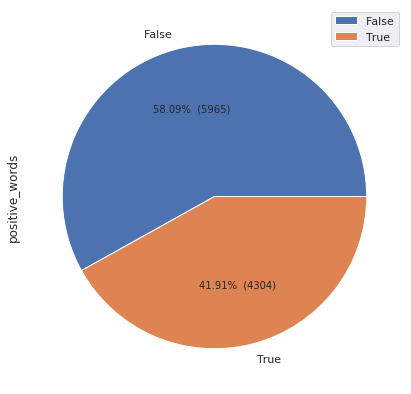

In [0]:
data_positive_likes = train_news['positive_words'].value_counts()
data_positive_likes.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_likes))

**Pie about numbers of words with positive feeling in the definition**

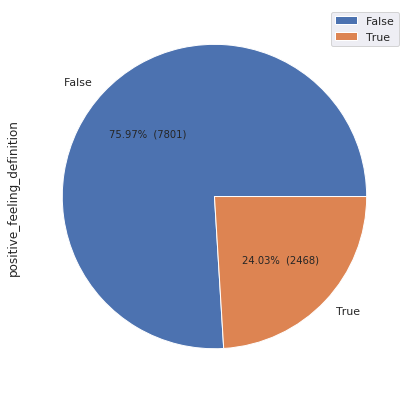

In [0]:
train_news['positive_feeling_definition'] = train_news['statement_feeling_score'] > 0
data_positive_feeling_definition = train_news['positive_feeling_definition'].value_counts()
data_positive_feeling_definition.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_feeling_definition));

In [0]:
max_definition_feeling = train_news['statement_feeling_score'].max()
min_definition_feeling = train_news['statement_feeling_score'].min()

bins = [min_definition_feeling-1,-1,1,max_definition_feeling+1]
definition_feeling_range = ['Negative','Neutral','Positive']

train_news['statement_feeling_category'] = pd.cut(train_news['statement_feeling_score'],
                                                   bins,
                                                   labels=definition_feeling_range)

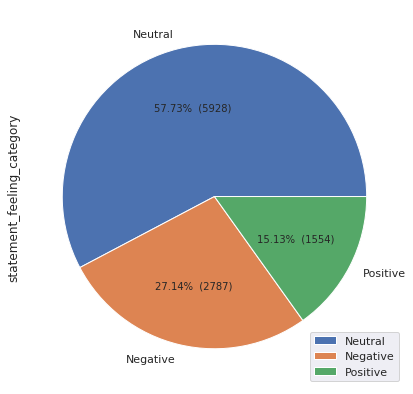

In [0]:
data_definition_feeling_category = train_news['statement_feeling_category'].value_counts()
data_definition_feeling_category.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_definition_feeling_category));

##**Doc2Vec**

Doc2vec is an adaptation of Word2Vec that allows us to learn document similarity. Doc2vec model by itself is an unsupervised method.

In [0]:
pip install tqdm

**Import required libraries**

In [0]:
import pandas as pd
import numpy as np
#from pandas.core.groupby import DataFrameGroupBy, SeriesGroupBy, GroupBy, PanelGroupBy
#from pandas.core.groupby import PanelGroupBy
from tqdm import tqdm
#tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

**Load the training dataset**

In [0]:
df = pd.read_excel("/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset/train.xlsx")
df = df[['statement','label']]
df = df[pd.notnull(df['statement'])]
df.rename(columns = {'statement':'narrative'}, inplace = True)
df.rename(columns = {'label':'category'}, inplace = True)
df.head(10)

,narrative,category
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,half-true
2,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,half-true
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,barely-true
7,I'm the only person on this stage who has work...,half-true
8,"However, it took $19.5 million in Oregon Lotte...",half-true
9,Says GOP primary opponents Glenn Grothman and ...,mostly-true


**Print the shape of dataset**

In [0]:
df.shape

(10269, 2)

In [0]:
df.index = range(10269)

In [0]:
df['narrative'].apply(lambda x: len(x.split(' '))).sum()

183919

In [0]:
df.isnull().sum()

narrative    0
category     0
dtype: int64

**Number of occurences for a particular category**

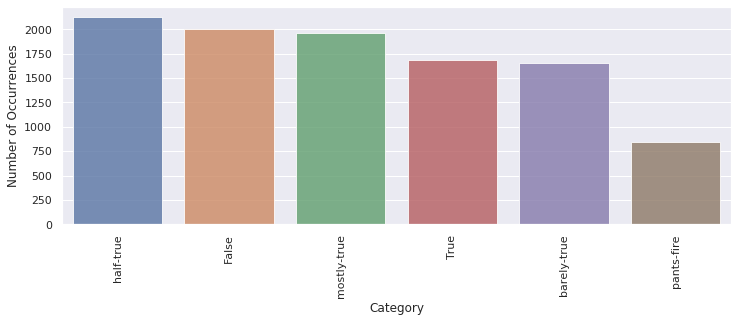

In [0]:
import seaborn as sns
cnt_pro = df['category'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

**Identify the label of a narrative**

In [0]:
def print_narrative(index):
    example = df[df.index == index][['narrative', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('category:', example[1])

In [0]:
print_narrative(11)

Since 2000, nearly 12 million Americans have slipped out of the middle class and into poverty.
category: half-true


## **Text Preprocessing**

Below we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

In [0]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['narrative'] = df['narrative'].apply(cleanText)

In [0]:
df['narrative'][3]

'health care reform legislation is likely to mandate free se change surgeries.'

In [0]:
df.shape

(10269, 2)

**Split the dataset into train and test sets**

In [0]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

**Tokenization**

In [0]:
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

**Download the resource 'punkt'**

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Document Tagging**

In [0]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.category]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.category]), axis=1)

In [0]:
train_tagged.values[30]

TaggedDocument(words=['on', 'banning', 'assault', 'weapons'], tags=[False])

## **Training the model**

I'll instantiate a Doc2Vec model-Distributed Bag of Words (DBOW). In the Word2Vec architecture, the two algorithm names are “continuous bag of words” (cbow) and “skip-gram” (sg); in the Doc2Vec architecture, the corresponding algorithms are “distributed bag of words” (dbow) and “distributed memory” (dm).

### **DBOW**

DBOW is the Doc2Vec model analogous to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

Training a Doc2Vec model is rather straight forward in Gensim, I have initialize the model and train for 30 epochs:

I have set the minimum word count to 2 in order to discard words with very few occurrences.

In [0]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [0]:
pip install tqdm

**Build a vocabulary**

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 7188/7188 [00:00<00:00, 663555.79it/s]


In [0]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 7188/7188 [00:00<00:00, 1108854.95it/s]


CPU times: user 27.5 s, sys: 2.46 s, total: 30 s
Wall time: 19 s


**Buliding the final vector feature for the classifier**

In [0]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [0]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [0]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.18208373904576436
Testing F1 score: 0.17557182401407334


### **Distributed Memory with Averaging**

Distributed Memory (DM) acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document. We again instantiate a Doc2Vec model with a vector size with 300 words and iterating over the training corpus 30 times.

In [0]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 7188/7188 [00:00<00:00, 1315386.44it/s]


In [0]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 7188/7188 [00:00<00:00, 1372202.32it/s]


CPU times: user 55.1 s, sys: 6.84 s, total: 1min 1s
Wall time: 47.7 s


## **Classification Algorithms before applying Word2Vec**

### **Logistic Regression**

In [0]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing accuracy 0.19539110678351185
Testing F1 score: 0.1962054523422087


In [0]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### **Decision Tree classifier**

**Create an instance of Decision Tree classifier**

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Train the Decision tree classifier**

In [0]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict = clf.predict(X_test)
y_predict

array(['pants-fire', 'mostly-true', 'mostly-true', ..., 'pants-fire',
       'mostly-true', 'mostly-true'], dtype='<U11')

**Print Accuracy score**

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19539110678351185
Testing F1 score: 0.1962054523422087


### **Random Forest Classifier**

**Create an instance of Random Forest classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Train the Classifier**

In [0]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_predict = clf.predict(X_test)
y_predict

array(['False', 'True', 'False', ..., 'barely-true', 'False', 'True'],
      dtype='<U11')

**Print Accuracy score**

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19539110678351185
Testing F1 score: 0.1962054523422087


### **Support Vector Machine**

**Create an instance of SVM classifier**

In [0]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

**Train the classifier**

In [0]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = clf.predict(X_test)
y_predict

array(['False', 'barely-true', 'False', ..., 'mostly-true', 'mostly-true',
       'mostly-true'], dtype='<U11')

**Print the Accuracy**

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19539110678351185
Testing F1 score: 0.1962054523422087


### **Naive Bayes Classifier**

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_predict = clf.predict(X_test)
y_predict

array(['False', 'barely-true', 'False', ..., 'mostly-true', 'mostly-true',
       'mostly-true'], dtype='<U11')

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19539110678351185
Testing F1 score: 0.1962054523422087


### **K - Nearest Neighbors**

In [0]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)

In [0]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
y_predict = clf.predict(X_test)
y_predict

array(['False', 'barely-true', 'False', ..., 'mostly-true', 'mostly-true',
       'mostly-true'], dtype='<U11')

In [0]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.19539110678351185
Testing F1 score: 0.1962054523422087


After applying Doc2Vec, I got the low accuracy score so I am going to apply Word2Vec to check if I get better accuracy

## **Conclusion:**

To begin with the Alternus Vera Phase 1, I have read the **Article on Fake News**: https://arxiv.org/pdf/1708.01967.pdf. Based on the article, I selected few factors/features which plays an important role in detection of fake news on social media. 

**Factor selection:**
*   Credibility/Fact Checks

*   Speaker Profile



In this experiment, I conducted a research on detection of fake news on the Liar Liar dataset based on a factor **"Credibility/Fact Checks"**. The chosen factor were based on the suggestions provided by Shu et al. (2017). While none of the factors alone can be applied for detection of fake news in a satisfactory way, they can be used in the final collective model (polynimial equation) to detect the fake news.

The accuracy for models is not good, so planning to implement Word2Vec and enrich the dataset with **glove** dictionary to improve the accuracy in next iteration.











## **References:**

*   https://www.kaggle.com/watts2/glove6b50dtxt#glove.6B.50d.txt
*   https://github.com/anuksebastian/AlternusVera/blob/master/AnuSebastian_012496276_PoliticalAffiliation_SocialMedia/AlternusVera_012496276_political_affiliation_AnuSebastian.ipynb
*   https://github.com/nishitpatel01/Fake_News_Detection